# Trabalho 2

* Ariel Bor Cheng Chen
* Felipe Tadaki Tosta Ida
* Gusthavo Henrique Parra da Silva
* Juan Lucas Montanaro

Essencialmente, o trabalho consiste em analisar quatro conjuntos de dados de forma a selecionar para cada um quais são os dois melhores algoritmos de classificação entre: árvore de decisão, k vizinhos mais próximos, naive bayes e perceptron de multicamadas.

Assim, vamos começar carregando as bibliotecas necessárias.

In [ ]:
#setup:
from time import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import roc_auc_score

PATH = "https://raw.githubusercontent.com/juan1411/Statistics-Degree-2022"
PATH += "/main/Data Science/IA_datasets/"

# Spaceship Titanic
### Prevendo quais passageiros serão transportados para uma dimensão alternativa.

Confira o breve resumo das variáveis disponíveis no problema:

*  `PassengerId` - Um identificador único para cada passageiro. Cada Id tem a forma 'gggg_pp' em que 'gggg' indica o grupo com que o passageiro está viajando e 'pp' é o seu número correspondente do grupo. As pessoas no grupo geralmente são familiares, mas nem sempre.
*  `HomePlanet` - O planeta do qual o passageiro está partindo, geralmente, o planete em que reside.
*  `CryoSleep` - Indica se o passageiro foi eleito para ser colocado em animação suspensa durante a viagem. Passageiros em 'cryosleep' estão confinados em suas cabines.
*  `Cabin` - O número da cabine onde o passageiro está; tem a forma 'deck/num/lado', em que lado pode ser 'P' para 'Porto' ou 'S' para 'Estibordo'.
*  `Destination` - O planeta ao qual o passageiro está se dirigindo.
*  `Age` - A idade do passageiro.
*  `VIP` - Indica se o passageiro pagou por serviço VIP especial durante a viagem.
*  `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - A quantia gasta em cada um dos serviços de luxo da 'Spaceship Titanic'.
* `Name` - O primeiro nome e o sobrenome de cada passageiro.
*  `Transported` - Indica se o passageiro foi transportado ou não. No caso, esta é a variável que queremos prever.

In [ ]:
# importando os dados:
np.random.seed(2022)
df = pd.read_csv(PATH+'space_titanic_train.csv', header=0)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Para o conjunto de treino, temos 8693 registros válidos, mas várias colunas apresentam observações faltantes (perceba que são difer. Tentaremos corrigir este problema sem excluir tais registros e, para isso, vejamos a análise exploratória dos dados.

## Análise Exploratória

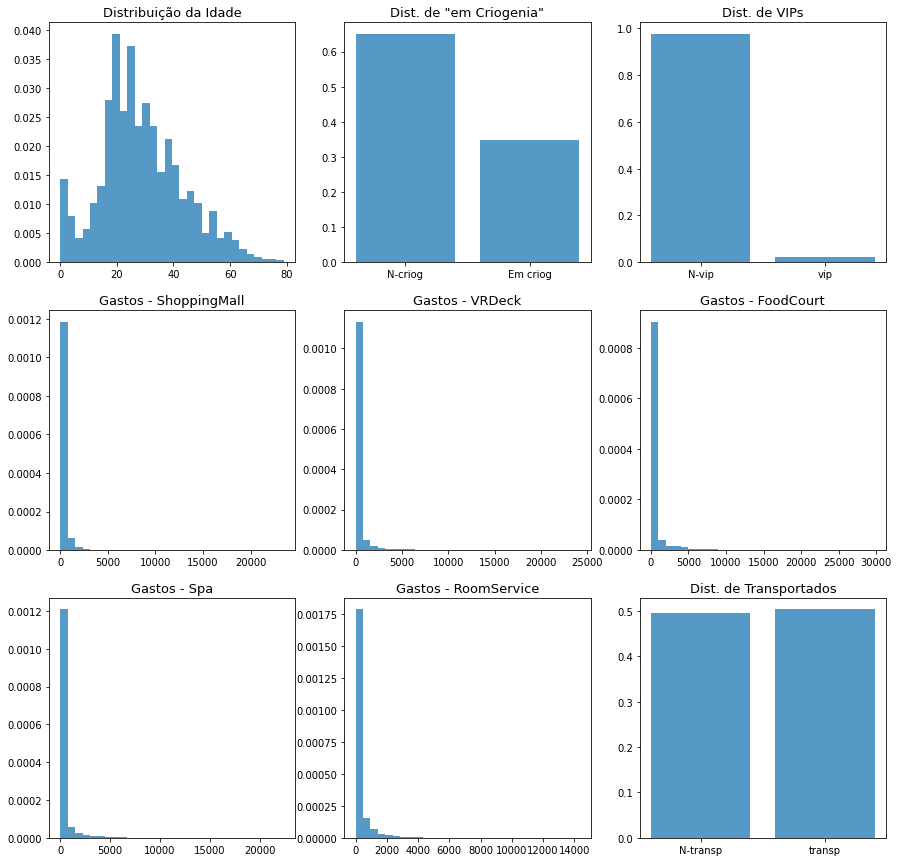

In [ ]:
# histogramas de variaveis numericas e binarias:
tam = df.shape[0]

plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.hist(df['Age'], bins=30, alpha=0.75, density=True)
plt.title('Distribuição da Idade', fontsize=13)

plt.subplot(3,3,2)
plt.bar([0, 1],
        [1 - df['CryoSleep'].sum()/tam, df['CryoSleep'].sum()/tam],
        alpha=0.75)
plt.xticks([0, 1], ['N-criog', 'Em criog'])
plt.title('Dist. de "em Criogenia"', fontsize=13)

plt.subplot(3,3,3)
plt.bar([0, 1],
        [1 - df['VIP'].sum()/tam, df['VIP'].sum()/tam],
        alpha=0.75)
plt.xticks([0, 1], ['N-vip', 'vip'])
plt.title('Dist. de VIPs', fontsize=13)

plt.subplot(3,3,4)
plt.hist(df['ShoppingMall'], bins=30, alpha=0.75, density=True)
plt.title('Gastos - ShoppingMall', fontsize=13)

plt.subplot(3,3,5)
plt.hist(df['VRDeck'], bins=30, alpha=0.75, density=True)
plt.title('Gastos - VRDeck', fontsize=13)

plt.subplot(3,3,6)
plt.hist(df['FoodCourt'], bins=30, alpha=0.75, density=True)
plt.title('Gastos - FoodCourt', fontsize=13)

plt.subplot(3,3,7)
plt.hist(df['Spa'], bins=30, alpha=0.75, density=True)
plt.title('Gastos - Spa', fontsize=13)

plt.subplot(3,3,8)
plt.hist(df['RoomService'], bins=30, alpha=0.75, density=True)
plt.title('Gastos - RoomService', fontsize=13)

plt.subplot(3,3,9)
plt.bar([0, 1],
        [1 - df['Transported'].sum()/tam, df['Transported'].sum()/tam],
        alpha=0.75)
plt.xticks([0, 1], ['N-transp', 'transp'])
plt.title('Dist. de Transportados', fontsize=13)
plt.show()

Dos histogramas acima, vemos que: 
- a quantidade de passageiros transportados e não transportados é bem próxima, logo já não esperamos viés de classificação _a priori_;
- os gastos em geral apresentam várias observações '0', até mesmo deformando os gráficos, o que dificulta para especificar uma distribuição de probabilidade adequada, mas talvez os gastos maiores que zero se adequem a distribuição exponencial;
- a quantidade de passageiros VIPs é muito pouca, praticamente irrelevante, diferente da variável "em criogenia";
- e por fim, a distribuição da idade é praticamente normal, tendo uma leve assimetria a esquerda, que ainda pode ser corrigida.

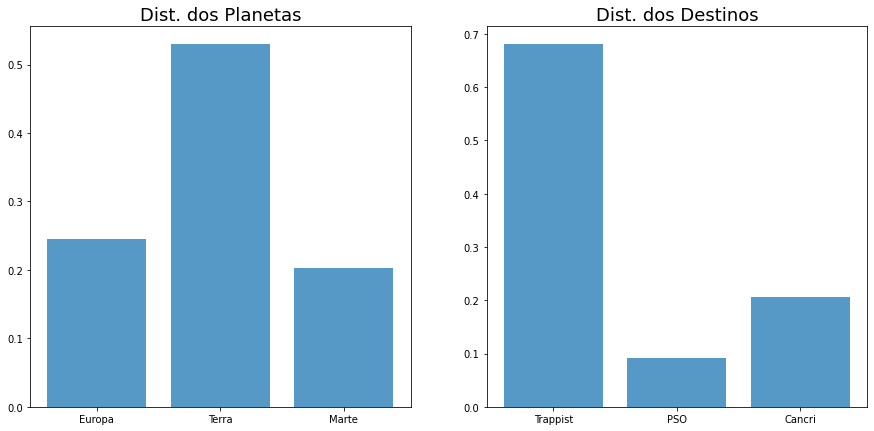

In [ ]:
# diagrama de barras dos 'planetas' e dos 'destinos':
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt.bar([0, 1, 2],
        [(df['HomePlanet']=='Europa').sum()/tam,
         (df['HomePlanet']=='Earth').sum()/tam,
         (df['HomePlanet']=='Mars').sum()/tam],
        alpha=0.75)
plt.xticks([0, 1, 2], ['Europa', 'Terra', 'Marte'])
plt.title('Dist. dos Planetas', fontsize=18)

plt.subplot(1,2,2)
plt.bar([0, 1, 2],
        [(df['Destination']=='TRAPPIST-1e').sum()/tam,
         (df['Destination']=='PSO J318.5-22').sum()/tam,
         (df['Destination']=='55 Cancri e').sum()/tam],
        alpha=0.75)
plt.xticks([0, 1, 2], ['Trappist', 'PSO', 'Cancri'])
plt.title('Dist. dos Destinos', fontsize=18)
plt.show()

Não há planetas de origem ou de destino que aparecem muito pouco, há uma mínima diversidade de pessoas.

Agora, continuando as análises, pensamos em criar algumas variáveis:
- deck: para indicar apenas o deck em que o passageiro está (obtida de `Cabin`);
- side: para indicar apenas o lado em que o passageiro está (obtida de `Cabin`);
- gastos em produtos: a soma entre os gastos com serviço de quarto, praça de alimentação e shopping;
- gastos em serviços: a soma entre os gastos no spa e no aparelho de realidade virtual;
- solo: um indicador se o passageiro está viajando sozinho o com mais algum familiar (obtida de `Name`), mesmo que estejam em grupos diferentes; e
- membros por grupo: o número de membros que está no grupo do passageiro (obtida de `PassengerId`).

In [ ]:
# criando variaveis que possivelmente vao ajudar:
df['Deck'] = df['Cabin'].map(lambda x: str(x)[0])
df['Side'] = df['Cabin'].map(lambda x: str(x)[-1])

df['Group'] = df['PassengerId'].map(lambda x: x[0:4])

df['Gastos_Produtos']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']
df['Gastos_Servicos'] = df['Spa'] + df['VRDeck']

aux = df['Name'].map(lambda y: str(y).split(' ')[1], na_action='ignore')
df['Solo'] = 1 # <- na duvida, o passageiro esta sozinho

for l_name in aux.unique():
    # verificando se os sobrenomes aparecem uma unica vez ou nao
    if (len(df['Solo'][aux == l_name]) > 1):
        df['Solo'][aux == l_name] = 0
    else:
        df['Solo'][aux == l_name] = 1
del aux

# contando os membros de cada grupo:
members = df['Group'].value_counts(sort=False)
members_rep = []

for i in members:
    for _ in range(1, i+1):
        # repetindo os valores para todas as pessoas do mesmo grupo
        members_rep.append(i)

df['MembersPerGroup'] = members_rep

decks_ind = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'n':7}
# T eh o identificador no caso desconhecido
df['Deck'] = df['Deck'].map(decks_ind)
df.head()

<ipython-input-5-f868336caa3c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Solo'][aux == l_name] = 1
<ipython-input-5-f868336caa3c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Solo'][aux == l_name] = 0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Deck,Side,Group,Gastos_Produtos,Gastos_Servicos,Solo,MembersPerGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,P,0001,0.0,0.0,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,5,S,0002,143.0,593.0,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0,S,0003,3619.0,6764.0,0,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0,S,0003,1654.0,3522.0,0,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,5,S,0004,524.0,567.0,0,1


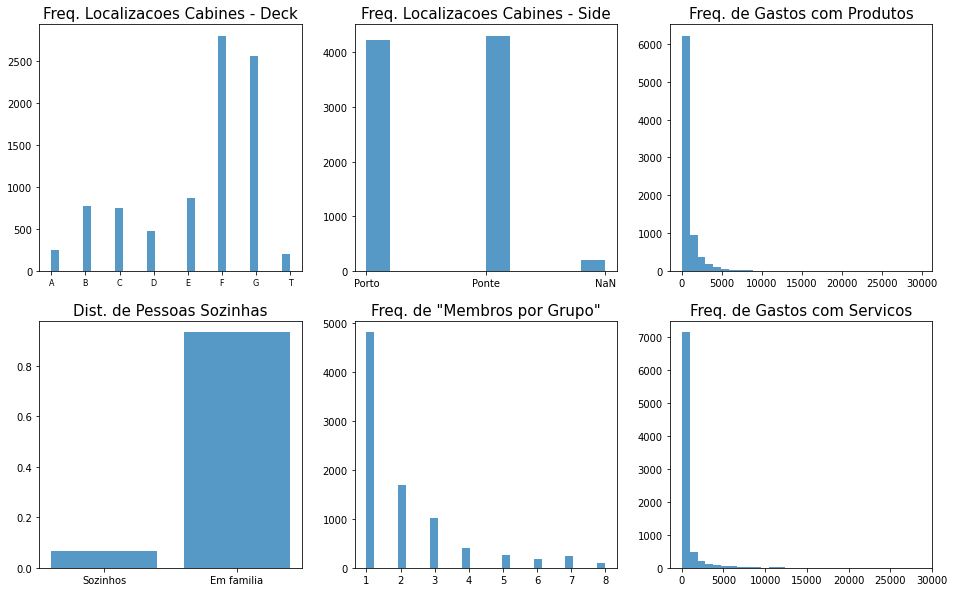

In [ ]:
# histogramas de frequencias de Deck e Side:
plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
plt.hist(df['Deck'], alpha=0.75, bins=30)
plt.xticks(range(0,8), decks_ind.keys(), fontsize=8)
plt.title('Freq. Localizacoes Cabines - Deck', fontsize=15)

plt.subplot(2,3,2)
plt.hist(df['Side'], alpha=0.75)
plt.xticks(['P', 'S', 'n'], ['Porto', 'Ponte', 'NaN'])
plt.title('Freq. Localizacoes Cabines - Side', fontsize=15)

# densidade das pessoas sozinhas:
plt.subplot(2,3,4)
plt.bar([0, 1],
        [df['Solo'].sum()/tam, 1 - df['Solo'].sum()/tam],
        alpha=0.75)
plt.title('Dist. de Pessoas Sozinhas', fontsize=15)
plt.xticks([0, 1], ['Sozinhos', 'Em familia'])

# histograma de frequencias de membros por grupo:
plt.subplot(2,3,5)
plt.hist(df['MembersPerGroup'], bins=30, alpha=0.75)
plt.title('Freq. de "Membros por Grupo"', fontsize=15)

# histogramas de frequencias de gastos:
plt.subplot(2,3,3)
plt.hist(df['Gastos_Produtos'], bins=30, alpha=0.75)
plt.title('Freq. de Gastos com Produtos', fontsize=15)

plt.subplot(2,3,6)
plt.hist(df['Gastos_Servicos'], bins=30, alpha=0.75)
plt.title('Freq. de Gastos com Servicos', fontsize=15)

plt.show()

Por estes últimos gráficos, verificamos que:
- agora as distribuições de gastos com produtos e serviços estão mais próximas da distribuição exponencial, apenas um pouco inflacionadas em zero;
- a nova variável `Side` é extremamente equilibrada e possivelmente poderá ser descartada;
- por outro lado, a variável `Deck` parece ser bem informativa quanto a localização das cabines; e
- por fim, aparentemente poucas pessoas estão viajando sozinhas, mesmo assim várias delas foram colocadas em grupos sozinhas, ou seja, talvez esta quantidade de pessoas por grupo não seja uma informação confiável;

Para terminar a análise exploratória, considere um mapa de calor para as correlações entre as variáveis:

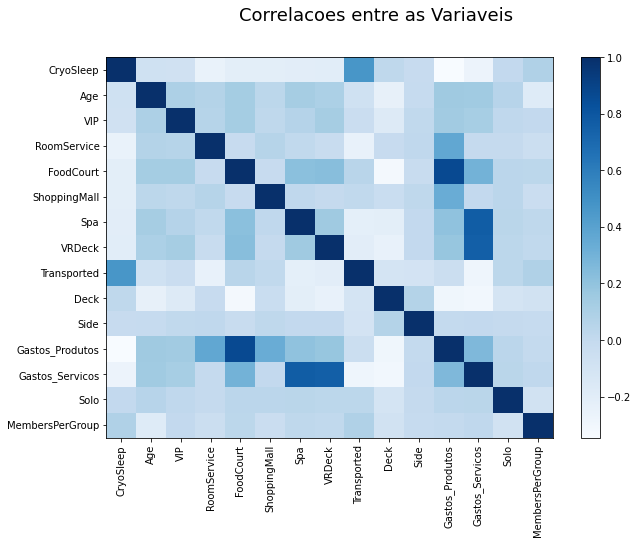

In [ ]:
# Matrix de correlacao:
df = df.replace(False, 0).replace(True, 1)
df['Side'] = df['Side'].map({'S':0, 'P':1, 'n':1})

corr = df.corr()
plt.figure(figsize=(10, 7))

plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle('Correlacoes entre as Variaveis', fontsize=18)
plt.grid(False)
plt.show()

De certa forma, ele apresenta argumentos a favor de nossas hipóteses de que `VIP`, `Side` e `MembersPerGroup` são não relevantes,  porém também indica o mesmo para outras variáveis, isto é, `Age`, `Deck`, `Gastos_Produtos` e até mesmo `Solo`.

## Tratamentos

Seguindo agora para a aplicação dos tratamentos; para completar as observações faltantes, decidimos uma estratégia para cada variável:
- `Age`: completaremos os valores com a mediana, isso ajudará na correção da assimetria posteriormente;
- `CryoSleep`: completaremos com valores simulados da distribuição Bin(1, $\hat{p}$), em que $\hat{p}$ é o estimador da probabilidade do passageiro estar em criogenia;
- `Side`: o mesmo de `CryoSleep`;
- `HomePlanet`: o mesmo de `CryoSleep`, porém, a distribuição será a Multinomial(1, $\hat{p_{p1}}, \hat{p_{p2}}, \hat{p_{p3}}$), sendo $\hat{p_{pi}}$ a probabilidade estimada do passageiro ter vindo do planeta "$pi$", $p1$='Earth', $p2$='Europa' e $p3$='Mars';
- `Destination`: idem `HomePlanet`, sendo $p1$='Cancri', $p2$='PSO' e $p3$='Trappist';
- `Gastos_Produtos`: completaremos com valores simulados da distribuição $Exp(\hat{\lambda})$ ou com zeros, sendo a probabilidade de ser 'com zero' dada por um estimador $\hat{p}$ (a frequência de valores iguais a zero), e sendo $\hat{\lambda}$ o estimador da média dos gastos maiores que zero; e por fim
- `Gastos_Servicos`: o mesmo de `Gastos_Produtos`.

Além disso, também mudaremos os tipos de todas as variáveis para numérico, aplicando One-Hot-Enconding nos planetas de origem e destino.

In [ ]:
# completando NaNs - Age, CryoSleep e Side:
age_med = df['Age'].median(axis=0)
df['Age'] = df['Age'].fillna(age_med)
df['Age'] = df['Age'].astype('int')

p_cryo = df['CryoSleep'].mean()
df['CryoSleep'].fillna(np.random.binomial(1, p_cryo), inplace=True)
df['CryoSleep'] = df['CryoSleep'].astype('uint8')

p_side = df['Side'].mean()
df['Side'].fillna(np.random.binomial(1, p_side), inplace=True)
df['Side'] = df['Side'].astype('uint8')


# tratando variaveis - MembersPerGroup, Solo e Transported:
df['MembersPerGroup'] = df['MembersPerGroup'].astype('int')
df['Solo'] = df['Solo'].astype('uint8')
df['Transported'] = df['Transported'].astype('uint8')


# completando NaNs - HomePlanet e Destination:
p_hp = pd.pivot_table(df, columns='HomePlanet',
                      aggfunc='count').loc['PassengerId']
p_hp *= 1/(tam - df['HomePlanet'].isnull().sum())
p_hp = p_hp.to_numpy() # estimadores pi para planetas de origem

p_dest = pd.pivot_table(df, columns='Destination',
                        aggfunc='count').loc['PassengerId']
p_dest *= 1/(tam - df['Destination'].isnull().sum())
p_dest = p_dest.to_numpy() # estimadores pi para planetas de destino


def trat_planet(p, list_P) -> str:
    ''' '''
    planet = np.array(list_P)
    ind = np.random.multinomial(1, p) == 1
    return planet[ind][0]


df['HomePlanet'].fillna(trat_planet(p_hp, ['Earth', 'Europa', 'Mars']),
                        inplace=True)
dest_map = {'55 Cancri e':'Cancri', 
            'PSO J318.5-22':'PSO',
            'TRAPPIST-1e':'Trappist'}
df['Destination'] = df['Destination'].replace(dest_map)
df['Destination'].fillna(trat_planet(p_dest, ['Cancri', 'PSO', 'Trappist']),
                         inplace=True)

# One-Hot enconding para os planetas:
planets = pd.get_dummies(df['HomePlanet'], prefix='Planet')
df = pd.concat([df, planets], axis=1)

dests = pd.get_dummies(df['Destination'], prefix='Dest')
df = pd.concat([df, dests], axis=1)

Dessa forma, ficamos com várias variáveis repetidas, então, vamos retirá-las.

In [ ]:
# retirando variaveis:
df.drop(['PassengerId', 'Cabin', 'Name', 'Destination', 'HomePlanet',
         'Group', 'VIP', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt',
         'RoomService'],
        axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        8693 non-null   uint8  
 1   Age              8693 non-null   int64  
 2   Transported      8693 non-null   uint8  
 3   Deck             8693 non-null   int64  
 4   Side             8693 non-null   uint8  
 5   Gastos_Produtos  8129 non-null   float64
 6   Gastos_Servicos  8325 non-null   float64
 7   Solo             8693 non-null   uint8  
 8   MembersPerGroup  8693 non-null   int64  
 9   Planet_Earth     8693 non-null   uint8  
 10  Planet_Europa    8693 non-null   uint8  
 11  Planet_Mars      8693 non-null   uint8  
 12  Dest_Cancri      8693 non-null   uint8  
 13  Dest_PSO         8693 non-null   uint8  
 14  Dest_Trappist    8693 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 424.6 KB


Agora, as únicas variáveis que sobraram para serem tratadas são os gastos. Assim, vejamos novamente o histogramas para eles.

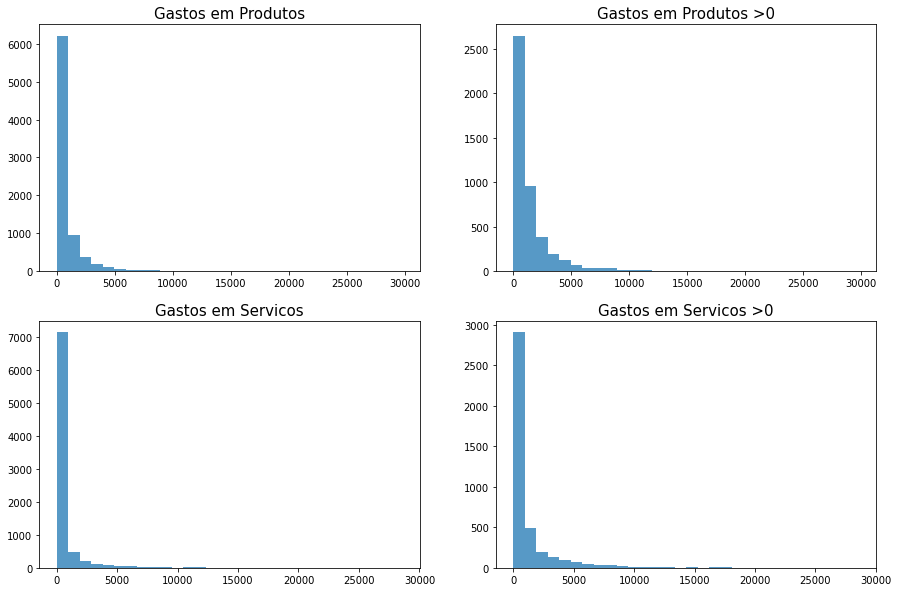

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['Gastos_Produtos'], bins=30, alpha=0.75)
plt.title('Gastos em Produtos', fontsize=15)

plt.subplot(2,2,2)
plt.hist(df['Gastos_Produtos'][df['Gastos_Produtos'] > 0],
         bins=30, alpha=0.75)
plt.title('Gastos em Produtos >0', fontsize=15)

plt.subplot(2,2,3)
plt.hist(df['Gastos_Servicos'], bins=30, alpha=0.75)
plt.title('Gastos em Servicos', fontsize=15)

plt.subplot(2,2,4)
plt.hist(df['Gastos_Servicos'][df['Gastos_Servicos'] > 0],
         bins=30, alpha=0.75)
plt.title('Gastos em Servicos >0', fontsize=15)

plt.show()

Perceba que os gastos maiores que zero podem de fato seguir uma distribuição exponencial, então como já explicado, vamos terminar de completar os dados faltantes.

In [ ]:
# completando NaNs - Gastos:
def trat_Gastos(p_hat, lambda_hat) -> float:
    aux = np.random.binomial(1, p_hat, 1)
    if (aux == 0):
        return 0
    else:
        return np.random.exponential(lambda_hat)

## estimadores da prob do gasto ser Zero:
p_prod = 1 - len(df['Gastos_Produtos'][df['Gastos_Produtos'] > 0])/tam
p_serv = 1 - len(df['Gastos_Servicos'][df['Gastos_Servicos'] > 0])/tam

## estimadores da média de gastos:
lambda_prod = df['Gastos_Produtos'][df['Gastos_Produtos'] > 0].mean()
lambda_serv = df['Gastos_Servicos'][df['Gastos_Servicos'] > 0].mean()

df['Gastos_Produtos'].fillna(trat_Gastos(p_prod, lambda_prod),
                             inplace=True)
df['Gastos_Servicos'].fillna(trat_Gastos(p_serv, lambda_serv),
                             inplace=True)

df.isnull().sum().sort_values(ascending=False)

CryoSleep          0
Age                0
Transported        0
Deck               0
Side               0
Gastos_Produtos    0
Gastos_Servicos    0
Solo               0
MembersPerGroup    0
Planet_Earth       0
Planet_Europa      0
Planet_Mars        0
Dest_Cancri        0
Dest_PSO           0
Dest_Trappist      0
dtype: int64

Finalmente, sem dados faltantes, vejamos as medidas de média e variância para cada variável.

In [ ]:
round(df.describe(), 3)

,CryoSleep,Age,Transported,Deck,Side,Gastos_Produtos,Gastos_Servicos,Solo,MembersPerGroup,Planet_Earth,Planet_Europa,Planet_Mars,Dest_Cancri,Dest_PSO,Dest_Trappist
count,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000
mean,0.349,28.790,0.504,4.367,0.507,802.918,589.713,0.067,2.036,0.553,0.245,0.202,0.207,0.092,0.701
std,0.477,14.341,0.500,1.803,0.500,1791.461,1686.765,0.250,1.596,0.497,0.430,0.402,0.405,0.288,0.458
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,20.000,0.000,3.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,27.000,1.000,5.000,1.000,13.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000
75%,1.000,37.000,1.000,6.000,1.000,875.000,483.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,1.000
max,1.000,79.000,1.000,7.000,1.000,29813.000,28600.000,1.000,8.000,1.000,1.000,1.000,1.000,1.000,1.000


Temos então algumas variáveis definidas no intervalo $[0, 1]$ e outras definidas em toda a reta real (ou na parte positiva dela). Assim, nossa tentativa de normalizar os dados será tomar o $log_{10}$ dos gastos e colocar as variáveis `Age`, `MembersPerGroup`, `log_Gastos_Produtos` e `log_Gastos_Servicos` com média zero e variância um.

In [ ]:
# tratamentos numericos:
df['Age'] = (df['Age'] - df['Age'].mean())/df['Age'].std()
df['MembersPerGroup'] = (df['MembersPerGroup'] - df['MembersPerGroup'].mean())/df['MembersPerGroup'].std()
df['log_Gastos_Prod'] = np.log10(df['Gastos_Produtos']+1) # '+1' para evitar o problema
df['log_Gastos_Serv'] = np.log10(df['Gastos_Servicos']+1) # de tomar o logaritmo de zero
df['log_Gastos_Prod'] = (df['log_Gastos_Prod'] - df['log_Gastos_Prod'].mean())/df['log_Gastos_Prod'].std()
df['log_Gastos_Serv'] = (df['log_Gastos_Serv'] - df['log_Gastos_Serv'].mean())/df['log_Gastos_Serv'].std()

round(df.describe(), 3)

,CryoSleep,Age,Transported,Deck,Side,Gastos_Produtos,Gastos_Servicos,Solo,MembersPerGroup,Planet_Earth,Planet_Europa,Planet_Mars,Dest_Cancri,Dest_PSO,Dest_Trappist,log_Gastos_Prod,log_Gastos_Serv
count,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000,8693.000
mean,0.349,-0.000,0.504,4.367,0.507,802.918,589.713,0.067,0.000,0.553,0.245,0.202,0.207,0.092,0.701,-0.000,0.000
std,0.477,1.000,0.500,1.803,0.500,1791.461,1686.765,0.250,1.000,0.497,0.430,0.402,0.405,0.288,0.458,1.000,1.000
min,0.000,-2.007,0.000,0.000,0.000,0.000,0.000,0.000,-0.649,0.000,0.000,0.000,0.000,0.000,0.000,-0.985,-0.841
25%,0.000,-0.613,0.000,3.000,0.000,0.000,0.000,0.000,-0.649,0.000,0.000,0.000,0.000,0.000,0.000,-0.985,-0.841
50%,0.000,-0.125,1.000,5.000,1.000,13.000,0.000,0.000,-0.649,1.000,0.000,0.000,0.000,0.000,1.000,-0.220,-0.841
75%,1.000,0.572,1.000,6.000,1.000,875.000,483.000,0.000,0.604,1.000,0.000,0.000,0.000,0.000,1.000,0.980,1.093
max,1.000,3.501,1.000,7.000,1.000,29813.000,28600.000,1.000,3.736,1.000,1.000,1.000,1.000,1.000,1.000,2.004,2.370


Agora sim, temos melhores variáveis para a tarefa de classificação.

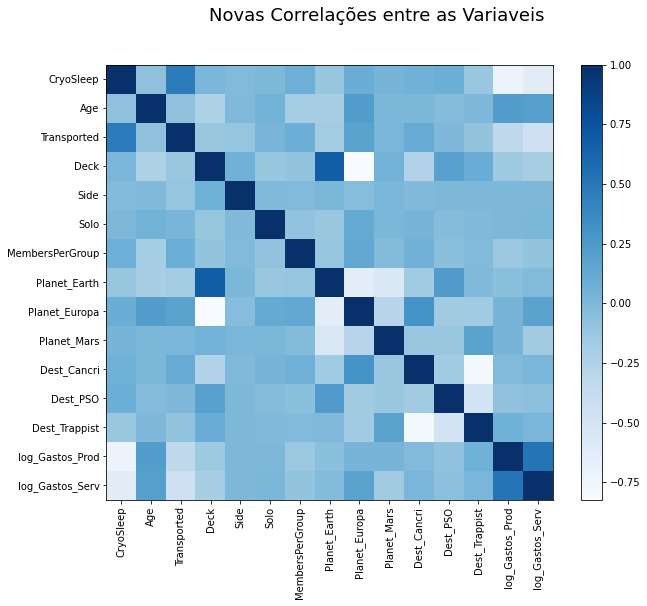

In [ ]:
# Matrix de correlação 2:
df.drop(['Gastos_Produtos', 'Gastos_Servicos'],
        axis=1, inplace=True)
corr = df.corr()
plt.figure(figsize=(10, 8))

plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle('Novas Correlações entre as Variaveis', fontsize=18)
plt.grid(False)
plt.show() 

Conferindo uma segunda vez a matriz de correlação, vemos que infelizmente os valores não mudaram muito e ainda há variáveis aparentemente não relevantes.

## Tratamento dos Dados de Teste

Como temos dois conjuntos de dados, um de treino e outro de teste, precisamos aplicar os mesmos tratamentos para os dados de teste também.

In [ ]:
teste = pd.read_csv(PATH+'space_titanic_test.csv', header=0)

PassengerId = teste['PassengerId']
print('Forma:', teste.shape)
teste.head()

Forma: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Verificando se há dados faltantes obtemos os seguintes valores:

In [ ]:
teste.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

Há alguns dados faltantes, já vamos tratá-los. Antes porém, considere a criação de novas variáveis:

In [ ]:
# criando variaveis:
teste['Deck'] = teste['Cabin'].map(lambda x: str(x)[0])
teste['Side'] = teste['Cabin'].map(lambda x: str(x)[-1])

teste['Group'] = teste['PassengerId'].map(lambda x: x[0:4])

teste['Gastos_Produtos'] = teste['RoomService'] + teste['FoodCourt'] + teste['ShoppingMall']
teste['Gastos_Servicos'] = teste['Spa'] + teste['VRDeck']

aux = teste['Name'].map(lambda y: str(y).split(' ')[1], na_action='ignore')
teste['Solo'] = 1

for l_name in aux.unique():
    if (len(teste['Solo'][aux == l_name]) > 1):
        teste['Solo'][aux == l_name] = 0
    else:
        teste['Solo'][aux == l_name] = 1
del aux

members = teste['Group'].value_counts(sort=False)
members_rep = []

for i in members:
    for _ in range(1, i+1):
        members_rep.append(i)

teste['MembersPerGroup'] = members_rep

#decks_ind = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7}
teste['Deck'] = teste['Deck'].map(decks_ind)

<ipython-input-17-94ee746c522c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['Solo'][aux == l_name] = 0
<ipython-input-17-94ee746c522c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['Solo'][aux == l_name] = 1


Agora sim, vamos completar as observações em falta e já mudar o tipo das variáveis para numérico.

In [ ]:
# Trocando valores de algumas colunas:
teste = teste.replace(False, 0).replace(True, 1)
teste['Side'] = teste['Side'].map({'S':0, 'P':1})

# Completando NaNs nas variaveis:
teste['Deck'].fillna(7, inplace=True)
teste['Deck'] = teste['Deck'].astype('int')

teste['Age'] = teste['Age'].fillna(age_med)
teste['Age'] = teste['Age'].astype('int')

teste['CryoSleep'].fillna(np.random.binomial(1, p_cryo), inplace=True)
teste['CryoSleep'] = teste['CryoSleep'].astype('uint8')

teste['Side'].fillna(np.random.binomial(1, p_side), inplace=True)
teste['Side'] = teste['Side'].astype('uint8')

teste['Gastos_Produtos'].fillna(trat_Gastos(p_prod, lambda_prod), inplace=True)
teste['Gastos_Servicos'].fillna(trat_Gastos(p_serv, lambda_serv), inplace=True)

teste['HomePlanet'].fillna(trat_planet(p_hp, ['Earth', 'Europa', 'Mars']),
                           inplace=True)
teste['Destination'] = teste['Destination'].replace(dest_map)
teste['Destination'].fillna(trat_planet(p_dest, ['Cancri', 'PSO', 'Trappist']),
                            inplace=True)

teste['MembersPerGroup'] = teste['MembersPerGroup'].astype('int')
teste['Solo'] = teste['Solo'].astype('uint8')

# One-Hot enconding para 'HomePlanet' e 'Destination':
planets = pd.get_dummies(teste['HomePlanet'], prefix='Planet')
teste = pd.concat([teste, planets], axis=1)

dests = pd.get_dummies(teste['Destination'], prefix='Dest')
teste = pd.concat([teste, dests], axis=1)

teste.isnull().sum().sort_values(ascending=False)

FoodCourt          106
Spa                101
Cabin              100
ShoppingMall        98
Name                94
VIP                 93
RoomService         82
VRDeck              80
MembersPerGroup      0
Planet_Earth         0
Planet_Europa        0
PassengerId          0
Gastos_Servicos      0
Planet_Mars          0
Dest_Cancri          0
Dest_PSO             0
Solo                 0
Deck                 0
Gastos_Produtos      0
Group                0
Side                 0
HomePlanet           0
Age                  0
Destination          0
CryoSleep            0
Dest_Trappist        0
dtype: int64

Sobraram os gastos específicos, mas logo vamos jogá-los fora. O importante por enquanto é considerar o mesmo tratamento de tomar o logarítmo dos gastos com produtos e serviços e normalizar as variáveis.

In [ ]:
# tratamentos numericos:
teste['Age'] = (teste['Age'] - teste['Age'].mean())/teste['Age'].std()
teste['MembersPerGroup'] = (teste['MembersPerGroup'] - teste['MembersPerGroup'].mean())/teste['MembersPerGroup'].std()
teste['log_Gastos_Prod'] = np.log10(teste['Gastos_Produtos']+1)
teste['log_Gastos_Serv'] = np.log10(teste['Gastos_Servicos']+1)
teste['log_Gastos_Prod'] = (teste['log_Gastos_Prod'] - teste['log_Gastos_Prod'].mean())/teste['log_Gastos_Prod'].std()
teste['log_Gastos_Serv'] = (teste['log_Gastos_Serv'] - teste['log_Gastos_Serv'].mean())/teste['log_Gastos_Serv'].std()

round(teste.describe(), 3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,...,Solo,MembersPerGroup,Planet_Earth,Planet_Europa,Planet_Mars,Dest_Cancri,Dest_PSO,Dest_Trappist,log_Gastos_Prod,log_Gastos_Serv
count,4277.000,4277.000,4184.000,4195.000,4171.000,4179.000,4176.000,4197.000,4277.000,4277.000,...,4277.000,4277.000,4277.000,4277.000,4277.000,4277.000,4277.000,4277.000,4277.000,4277.000
mean,0.383,-0.000,0.018,219.266,439.484,177.296,303.052,310.710,4.415,0.487,...,0.169,-0.000,0.529,0.234,0.237,0.197,0.091,0.713,-0.000,0.000
std,0.486,1.000,0.132,607.011,1527.663,560.821,1117.186,1246.995,1.746,0.500,...,0.375,1.000,0.499,0.424,0.425,0.397,0.287,0.453,1.000,1.000
min,0.000,-2.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-0.649,0.000,0.000,0.000,0.000,0.000,0.000,-1.118,-0.828
25%,0.000,-0.615,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,...,0.000,-0.649,0.000,0.000,0.000,0.000,0.000,0.000,-1.118,-0.828
50%,0.000,-0.116,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,...,0.000,-0.649,1.000,0.000,0.000,0.000,0.000,1.000,0.393,-0.828
75%,1.000,0.597,0.000,53.000,78.000,33.000,50.000,36.000,6.000,1.000,...,0.000,0.002,1.000,0.000,0.000,0.000,0.000,1.000,0.925,1.096
max,1.000,3.591,1.000,11567.000,25273.000,8292.000,19844.000,22272.000,7.000,1.000,...,1.000,3.905,1.000,1.000,1.000,1.000,1.000,1.000,1.787,2.324


Quase acabando, faltou retirar as variáveis que não serão usadas.

In [ ]:
# retirando variaveis:
teste.drop(['PassengerId', 'Cabin', 'Name', 'Destination', 'HomePlanet',
            'Group', 'VIP', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt',
            'RoomService', 'Gastos_Produtos', 'Gastos_Servicos'],
           axis=1, inplace=True)

teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        4277 non-null   uint8  
 1   Age              4277 non-null   float64
 2   Deck             4277 non-null   int64  
 3   Side             4277 non-null   uint8  
 4   Solo             4277 non-null   uint8  
 5   MembersPerGroup  4277 non-null   float64
 6   Planet_Earth     4277 non-null   uint8  
 7   Planet_Europa    4277 non-null   uint8  
 8   Planet_Mars      4277 non-null   uint8  
 9   Dest_Cancri      4277 non-null   uint8  
 10  Dest_PSO         4277 non-null   uint8  
 11  Dest_Trappist    4277 non-null   uint8  
 12  log_Gastos_Prod  4277 non-null   float64
 13  log_Gastos_Serv  4277 non-null   float64
dtypes: float64(4), int64(1), uint8(9)
memory usage: 204.8 KB


Finalmente, todo o processo de tratamento dos dados foi terminado.

## Classificadores

Agora, a melhor parte do trabalho: ajustar as funções de classificação para os dados. 

Primeiramente, é preciso lembrar que este é um conjunto de dados proveniente do site kaggle (um site essencialmente de competições de ciência de dados), por isso temos um conjunto de treino rotulado e um de teste não rotulado. Além disso, o site usa a métrica de acurácia para o calculo da taxa de acerto, então também vamos usá-la como métrica de treino.

Dessa forma, os próximos blocos de código serão sobre ajustes e análises de classificadores para os dados, usando também validação cruzada com 10-folds. Começemos transformando as observações para numpy:

In [ ]:
# Transformação para numpy:
y = df['Transported'].to_numpy()
dados = df.drop('Transported', axis=1, inplace=False)
X = dados.to_numpy()

# criação de 10-folds para a validação cruzada:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# transformação para numpy:
X_teste = teste.to_numpy()

### KNN

O primeiro classificador que ajustaremos será o "k-vizinhos-mais-próximos" (KNN, na sigla em inglês). Faremos uma busca exaustiva para encontrar os melhores parâmetros considerando o número de "vizinhos" no intervalo [1, 50] e a função de "Minkowski" para o calculo da distância, com o valor p entre 1 e 4.

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
vk = list(range(1, 51))
parametros = {'n_neighbors': vk, 'p': [1,2,3,4]}
model = KNeighborsClassifier(n_jobs=-1)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [6,17,18,19]]

,params,mean_test_score,std_test_score,rank_test_score
152,"{'n_neighbors': 39, 'p': 1}",0.767280,0.017668,1
120,"{'n_neighbors': 31, 'p': 1}",0.766703,0.021129,2
128,"{'n_neighbors': 33, 'p': 1}",0.766588,0.018616,3
140,"{'n_neighbors': 36, 'p': 1}",0.765898,0.017032,4
136,"{'n_neighbors': 35, 'p': 1}",0.765898,0.018744,5
112,"{'n_neighbors': 29, 'p': 1}",0.765783,0.019740,6
132,"{'n_neighbors': 34, 'p': 1}",0.765668,0.017271,7
160,"{'n_neighbors': 41, 'p': 1}",0.765553,0.019006,8
148,"{'n_neighbors': 38, 'p': 1}",0.765552,0.019604,9
84,"{'n_neighbors': 22, 'p': 1}",0.765438,0.016394,10


Vendo os melhores resultados, vamos considerar diretamente o melhor modelo segundo a métrica de acurácia, ou seja, 39 "vizinhos" e função de "Minkowski" com p valendo um.

In [ ]:
# ajustando o melhor modelo
model = KNeighborsClassifier(n_neighbors=39, p=1, n_jobs=-1)
model.fit(X,y)

# realizando as classificacoes para os dados de teste
y_pred = model.predict(X_teste) 
y_pred = np.array(y_pred, dtype = int)

# Gravando para submissao no Kaggle
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId
prediction['Transported'] = y_pred
prediction = prediction.replace(0, False).replace(1, True)

prediction.to_csv('New_Titanic-KNN.csv', index = False)

Ajustado o melhor modelo, fizemos as classificações para as observações de teste, salvamos em um arquivo csv para verificar no kaggle no taxa de acerto e obtemos um resultado de 76,06% de acurácia.

### Naive Bayes

O próximo classificador que ajustaremos será o Naive Bayes. Porém não temos com fazer a escolha de hiperparâmetros considerando apenas a versão gaussiana do classificador, então decidimos incluir também a versão multinomial, apenas teremos que fazer um pequeno ajuste nos dados. Mas começando pela versão normal:

In [ ]:
nb_norm = GaussianNB()
vacc = []

for train_index, val_index in cv.split(X, y):
    # separando o conjunto de dados
    x_train, x_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # ajustando o modelo para 9-folds
    nb_norm.fit(x_train, y_train)
    # predizendo os valores para 1-fold
    y_pred = nb_norm.predict(x_val)
    # calculando a porcentagem de acurácia
    score = accuracy_score(y_val, y_pred)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')
print(f'Máxima: {100*max(vacc):.2f}%;')
print(f'Mínima: {100*min(vacc):.2f}%.')

----- Acurácia -----
Média: 73.93%;
Máxima: 77.36%;
Mínima: 71.35%.


Segundo a validação cruzada, já temos um resultado inferior do que o classificador KNN. Vejamos o resultado da versão multinomial:

In [ ]:
# a versao multinomial so aceita valores entre 0 e 1
X_aux = X.copy()

# ajuste dos dados para o intervalo [0,1]:
for i in range(X.shape[1]):
    a = X[:, i]
    X_aux[:, i] = (a - min(a))/(max(a) - min(a))

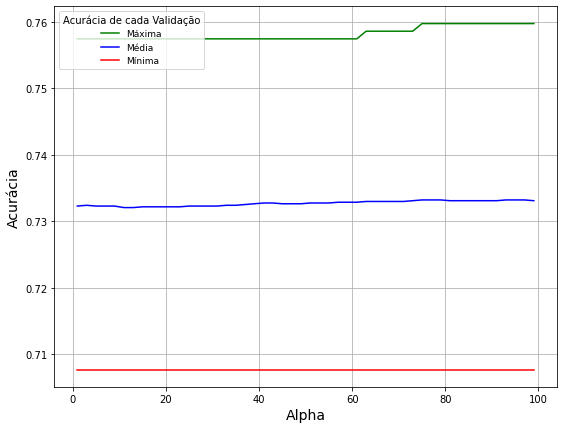

In [ ]:
acc_med = []
acc_max = []
acc_min = []

for alp in range(1, 101, 2):
    nb_mult = MultinomialNB(alpha=alp, fit_prior=False)
    vacc = []

    for train_index, val_index in cv.split(X, y):
        # separando o conjunto de dados
        x_train, x_val = X_aux[train_index], X_aux[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # ajustando o modelo para 9-folds
        nb_mult.fit(x_train, y_train)
        # predizendo os valores para 1-fold
        y_pred = nb_mult.predict(x_val)
        # calculando a porcentagem de acurácia
        score = accuracy_score(y_val, y_pred)
        vacc.append(score)

    acc_med.append(np.mean(vacc))
    acc_min.append(min(vacc))
    acc_max.append(max(vacc))


plt.figure(figsize=(9, 7))

plt.plot(range(1, 101, 2), acc_max, '-g', label='Máxima')
plt.plot(range(1, 101, 2), acc_med, '-b', label='Média')
plt.plot(range(1, 101, 2), acc_min, '-r', label='Mínima')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Acurácia', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=9, loc='upper left', title='Acurácia de cada Validação')
plt.show()

Infelizmente, os resultados do classificador Naive Bayes Multinomial foram piores do que o Gaussiano. Então, vejamos sua taxa de acerto no conjunto de teste.

In [ ]:
# ajustando o melhor modelo
model = GaussianNB()
model.fit(X,y)

# realizando as classificacoes para os dados de teste
y_pred = model.predict(X_teste) 
y_pred = np.array(y_pred, dtype = int)

# Gravando para submissao no Kaggle
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId
prediction['Transported'] = y_pred
prediction = prediction.replace(0, False).replace(1, True)

prediction.to_csv('New_Titanic-NaiveBayes.csv', index = False)

Repetindo os passos de submeter na plataforma nossas classificações, obtemos uma de taxa de acerto de 73,98%, inferior ao classificador KNN, como esperado.

### Árvore de Decisão

Prosseguindo, ajustaremos uma árvore de decisão.

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'criterion': ('gini', 'entropy'),
              'splitter': ('best', 'random'),
              'max_depth': list(range(5,21)),
              'min_samples_leaf': [1,2,3,4,5],
              'max_features': ('auto', 'sqrt', 'log2'),
              'max_leaf_nodes': [10,30,50,70,90,110]
              }
model = DecisionTreeClassifier(min_samples_split=10, random_state=42)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,6,7,8,9,21,22,23]]

,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,mean_test_score,std_test_score,rank_test_score
1070,gini,10,log2,110,1,best,0.761528,0.017811,1
950,gini,10,auto,110,1,best,0.761528,0.017811,1
1010,gini,10,sqrt,110,1,best,0.761528,0.017811,1
1012,gini,10,sqrt,110,2,best,0.761413,0.017230,4
1072,gini,10,log2,110,2,best,0.761413,0.017230,4
952,gini,10,auto,110,2,best,0.761413,0.017230,4
940,gini,10,auto,90,1,best,0.759573,0.018098,7
1060,gini,10,log2,90,1,best,0.759573,0.018098,7
1000,gini,10,sqrt,90,1,best,0.759573,0.018098,7
930,gini,10,auto,70,1,best,0.758306,0.018775,10


Temos que os melhores resultados são obtidos com o critério de gini, uma observação por folha, profundidade máxima de 10 e no máximo 110 folhas, sendo o modo de escolha da quantidade de atributos irrelevante. Assim, vejamos como é a estrutura da melhor árvore de decisão a seguir.

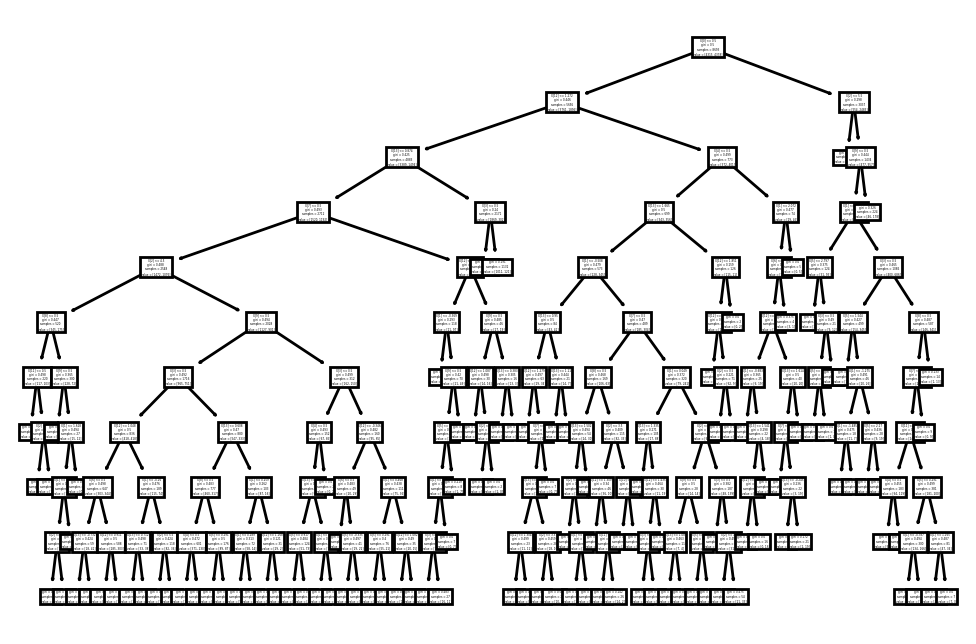

In [ ]:
# ajustando o melhor modelo
model = DecisionTreeClassifier(criterion='gini', splitter='best',
                               max_depth=10, min_samples_leaf=1,
                               max_features='auto', max_leaf_nodes=110,
                               min_samples_split=10, random_state=42)
model.fit(X,y)

# visualizando a estrutura da arvore
plt.figure(dpi=200)
plot_tree(model)
plt.show()

São tantos nós que nem é possível ler a descrição da covariável que forma cada um, mas essa é a estrutura. Continuando, vamos descobrir qual é a taxa de acerto deste classificador no conjunto de teste.

In [ ]:
# realizando as classificacoes para os dados de teste
y_pred = model.predict(X_teste) 
y_pred = np.array(y_pred, dtype = int)

# Gravando para submissao no Kaggle
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId
prediction['Transported'] = y_pred
prediction = prediction.replace(0, False).replace(1, True)

prediction.to_csv('New_Titanic-DecTree.csv', index = False)

Novamente, submetendo no site o arquivo resultante das classificações, obtemos uma taxa de 74,63% de acurácia no conjunto de teste, ela é maior do que a taxa do melhor classificador Naive Bayes, mas ainda é pior do que o KNN.

### Perceptron Multicamadas

Por fim, o último classificador que ajustaremos será o Perceptron de multicamadas (MLP, na sigla em inglês).

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'hidden_layer_sizes': [(16,), (32,), (16,16),
                                     (16,32), (32, 32)],
              'activation': ('relu', 'tanh', 'logistic'),
              'solver': ('adam', 'lbfgs')
              }
model = MLPClassifier(batch_size=200, learning_rate='invscaling',
                      shuffle=False, random_state=42, max_iter=1000)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,6,18,19,20]]

,param_activation,param_hidden_layer_sizes,param_solver,mean_test_score,std_test_score,rank_test_score
6,relu,"(16, 32)",adam,0.771191,0.016279,1
27,logistic,"(16, 32)",lbfgs,0.770960,0.017923,2
2,relu,"(32,)",adam,0.770844,0.019912,3
1,relu,"(16,)",lbfgs,0.770730,0.019053,4
10,tanh,"(16,)",adam,0.770272,0.015567,5
7,relu,"(16, 32)",lbfgs,0.770268,0.020274,6
21,logistic,"(16,)",lbfgs,0.769810,0.019305,7
5,relu,"(16, 16)",lbfgs,0.769006,0.015915,8
14,tanh,"(16, 16)",adam,0.768775,0.015071,9
28,logistic,"(32, 32)",adam,0.768661,0.016770,10


Observamos dessa vez que este classificador tem potencial de superar a taxa de acurácia do KNN, mesmo no conjunto de treino a taxa de acerto médio já foi maior. Então, vejamos como o MLP com os melhores hiperparâmetros performa no conjunto de treino.

In [ ]:
# ajustando o melhor modelo
model = MLPClassifier(hidden_layer_sizes=(16,32), activation='relu',
                       solver='adam', batch_size=200,
                       learning_rate='invscaling', max_iter=1000,
                       shuffle=False, random_state=42
                      )
model.fit(X,y)

# realizando as classificacoes para os dados de teste
y_pred = model.predict(X_teste) 
y_pred = np.array(y_pred, dtype = int)

# Gravando para submissao no Kaggle
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId
prediction['Transported'] = y_pred
prediction = prediction.replace(0, False).replace(1, True)

prediction.to_csv('New_Titanic-MLP.csv', index = False)

Uma última vez, submetendo o arquivo com as classificações, obtemos uma taxa de 75,99% de acurácia para o classificador MLP, a segunda melhor, ainda atrás do modelo KNN.

## Conclusão

Portanto, para terminar a análise, vamos fazer a diferença absoluta entre os dois melhores classificadores, isto é, o modelo KNN e o MLP.

In [ ]:
# diferença absoluta entre KNN e MLP

knn = KNeighborsClassifier(n_neighbors=39, p=1, n_jobs=-1)

mlp = MLPClassifier(hidden_layer_sizes=(16,32), activation='relu',
                    solver='adam', batch_size=200,
                    learning_rate='invscaling', max_iter=1000,
                    shuffle=False, random_state=42)

resultados = {'Iteração': list(range(5)), 'ACC Médio KNN': [],
              'DP ACC KNN': [], 'Tempo Médio KNN': [],
              'ACC Médio MLP':[], 'DP ACC MLP': [], 'Tempo Médio MLP': [],
              'ACC Médio ABS': [], 'DP ACC ABS': []}

# amostragem dos resultados dos modelos:
for i in range(5):
    knn_amostral = []
    dt_knn = []
    mlp_amostral = []
    dt_mlp = []
    dif_amostral = []
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    for ind_train, ind_val in cv.split(X, y):
        # separando em conjuntos de treino e validacao
        x_train, x_test = X[ind_train], X[ind_val]
        y_train, y_test = y[ind_train], y[ind_val]

        # ajustando os modelos para 9-folds
        t_knn = time()
        knn.fit(x_train, y_train)
        dt_knn.append(time() - t_knn)
        t_mlp = time()
        mlp.fit(x_train, y_train)
        dt_mlp.append(time() - t_mlp)

        # calculando as acuracias em 1-fold
        knn_amostral.append(accuracy_score(y_test, knn.predict(x_test)))
        mlp_amostral.append(accuracy_score(y_test, mlp.predict(x_test)))
        dif_amostral.append(abs(knn_amostral[-1] - mlp_amostral[-1]))

    resultados['ACC Médio KNN'].append(np.mean(knn_amostral))
    resultados['DP ACC KNN'].append(np.std(knn_amostral))
    resultados['Tempo Médio KNN'].append(np.mean(dt_knn))
    resultados['ACC Médio MLP'].append(np.mean(mlp_amostral))
    resultados['DP ACC MLP'].append(np.std(mlp_amostral))
    resultados['Tempo Médio MLP'].append(np.mean(dt_mlp))
    resultados['ACC Médio ABS'].append(np.mean(dif_amostral))
    resultados['DP ACC ABS'].append(np.std(dif_amostral))

res = pd.DataFrame(resultados)
res

,Iteração,ACC Médio KNN,DP ACC KNN,Tempo Médio KNN,ACC Médio MLP,DP ACC MLP,Tempo Médio MLP,ACC Médio ABS,DP ACC ABS
0,0,0.767169,0.004223,0.026960,0.772690,0.009751,14.316019,0.011044,0.008088
1,1,0.764177,0.007690,0.019517,0.771079,0.011681,12.338591,0.010354,0.006808
2,2,0.766135,0.011936,0.019831,0.772230,0.006114,11.659468,0.010008,0.006766
3,3,0.766827,0.011391,0.021010,0.769702,0.011604,10.877041,0.007017,0.004439
4,4,0.766360,0.010607,0.019497,0.774072,0.008868,11.145327,0.012309,0.003819


Logo, veja que a diferença absoluta entre os modelos é de aproximadamente 1%, sendo o Percepton de Multicamadas o melhor, porém, ele também é mais complicado e precisa de mais tempo de treino.

Dessa forma, se fosse necessário escolher, optaríamos por ficar com o classificador KNN, pois ele é mais simples, mais fácil de explicar, possui uma excelente acurácia e não precisa de tanto tempo para ser treino.

# Risco de estar Infectado com COVID-19

Nosso objetivo é classificar o risco de ser contaminado pelo COVID-19 de acordo com o conjunto de atributos, os quais incluem as seguintes variáveis:

1. `id`: O número de identificação do paciente

2. `sex`: Identifique o gênero do paciente, 1 feminino e 2 masculino.

3. `patient_type`: Tipo de paciente, 1 para não hospitalizado e 2 para hospitalizado.

4. `entry_date`: a data em que o paciente foi ao hospital.

5. `date_symptoms`: A data em que o paciente começou a apresentar sintomas.

6. `date_died`: a data em que o paciente morreu, “9999-99-99” significa recuperado.

7. `intubed`: a intubação é um procedimento usado quando você não consegue respirar por conta própria. O médico coloca um tubo na garganta e na traqueia para facilitar a entrada e a saída de ar dos pulmões. Uma máquina chamada ventilador bombeia o ar com oxigênio extra. Em seguida, ajuda a expirar o ar que está cheio de dióxido de carbono (CO2). “1” indica que o paciente usou ventilador e “2” indica que o paciente não usou, “97” “98” “99” significa não especificado.

8. `pneumonia`: Indica se o paciente já tem inflamação dos sacos de ar ou não “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

9. `age`: especifica a idade do paciente.

10. `pregnancy`: indica se a paciente está grávida ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

11. `diabetes`: indica se o paciente tem diabetes ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

12. `copd`: Indica se o paciente tem doença pulmonar obstrutiva crônica (DPOC) ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

13. `asthma`: indica se o paciente tem asma ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

14. `inmsupr`: Indica se o paciente é imunossuprimido ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

15. `hypertension`: indica se o paciente tem hipertensão ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

16. `other_disease`: Indica se o paciente tem outra doença ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

17. `cardiovascular`: indica se o paciente tem doença relacionada ao coração ou aos vasos sanguíneos, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

18. `obesity`: indica se o paciente é obeso ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

19. `renal_chronic`: Indica se o paciente tem doença renal crônica ou não, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

20. `tobacco`: indica se se o paciente é usuário de tabaco, “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

21. `contact_other_covid`: indica se o paciente contatou outro paciente covid19.

22. `icu`: Indica se o paciente foi internado em Unidade de Terapia Intensiva (UTI), “1” para sim, “2” para não, “97” “98” “99” significa não especificado.

23. `covid_res`: 1 indica que a pessoa está com covid , 2 indica que a pessoa não está com covid, 3 indica que o resultado está aguardando o processo.

Agora, de fato, lendo os dados:

In [ ]:
# download da base de dados
!wget https://github.com/juan1411/Statistics-Degree-2022/blob/main/DS_ML_AI/IA_datasets/covid.zip?raw=true -O cov.zip

--2022-12-02 18:38:29--  https://github.com/juan1411/Statistics-Degree-2022/blob/main/DS_ML_AI/IA_datasets/covid.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/juan1411/Statistics-Degree-2022/raw/main/DS_ML_AI/IA_datasets/covid.zip [following]
--2022-12-02 18:38:29--  https://github.com/juan1411/Statistics-Degree-2022/raw/main/DS_ML_AI/IA_datasets/covid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juan1411/Statistics-Degree-2022/main/DS_ML_AI/IA_datasets/covid.zip [following]
--2022-12-02 18:38:29--  https://raw.githubusercontent.com/juan1411/Statistics-Degree-2022/main/DS_ML_AI/IA_datasets/covid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Conne

In [ ]:
# descompactando os dados
!unzip /content/cov.zip

Archive:  /content/cov.zip
  inflating: covid.csv               


In [ ]:
dados=pd.read_csv('covid.csv')
print("Número de linhas e colunas dos dados:", dados.shape)
dados.head()

Número de linhas e colunas dos dados: (566602, 23)


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## Limpeza dos dados



Vemos que alguns atributos são irrelavantes, como entry_date, date_died, date_symptoms, id. Vamos retirar esses atributos no conjuntos de dados.

In [ ]:
dados.drop(columns={'entry_date','date_died','date_symptoms','id'},
           axis=1,inplace=True)
dados.shape

(566602, 19)

Verificar se o conjunto de dados apresenta valores nulos (not a number: nan).

In [ ]:
dados.isnull().sum().sort_values(ascending=False).head(10)

sex                    0
hypertension           0
covid_res              0
contact_other_covid    0
tobacco                0
renal_chronic          0
obesity                0
cardiovascular         0
other_disease          0
inmsupr                0
dtype: int64

Vemos que o conjunto não apresenta valores nulos.

A seguir, confira os resultados do testes de covid.

In [ ]:
dados['covid_res'].value_counts().to_frame()

,covid_res
2,279035
1,220657
3,66910


Agora, vamos substituir 2 por 0 e 3 por 2, mantendo 1 como 1.

In [ ]:
dados['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
dados['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657
2,66910


Agora, temos:

1. negativo;
2. positivo;
3. esperando o resultado.

Text(0.5, 1.0, 'Resultado Covid')

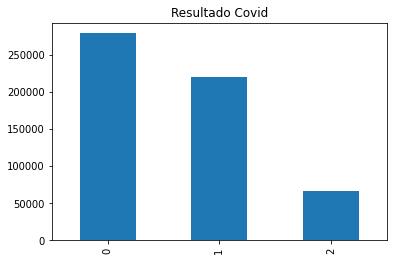

In [ ]:
dados['covid_res'].value_counts().sort_index().plot.bar()
plt.title('Resultado Covid')

Como estamos nos concentrando em sermos contaminados pelo Covid-19, nosso foco será em se o resultado é positivo ou negativo, portanto, descartamos o resultado 2. Ou seja, descartamos todas as linhas que contêm o resultado 2.

Text(0.5, 1.0, 'Resultado Covid')

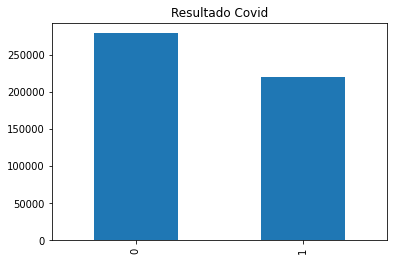

In [ ]:
dados=dados[dados['covid_res']!=2]

dados['covid_res'].value_counts().sort_index().plot.bar()
plt.title('Resultado Covid')

Como estamos nos concentrando na previsão de sermos contaminados pelo Covid-19, descartamos todos os valores que indicam valores NaN. Todos esses valores, exceto 1 e 2, são NaN.

In [ ]:
lst=dados.columns
for i in range(19):
    print(dados[lst[i]].value_counts().to_frame())
    print("----------------")

      sex
2  253098
1  246594
----------------
   patient_type
1        392146
2        107546
----------------
    intubed
97   392146
2     98321
1      9103
99      122
----------------
    pneumonia
2      420965
1       78716
99         11
----------------
       age
30   12872
31   12298
36   12292
38   12259
37   12248
..     ...
117      1
115      1
105      1
107      1
111      1

[120 rows x 1 columns]
----------------
    pregnancy
97     253098
2      241644
1        3614
98       1336
----------------
    diabetes
2     435702
1      62349
98      1641
----------------
      copd
2   489970
1     8276
98    1446
----------------
    asthma
2   482036
1    16214
98    1442
----------------
    inmsupr
2    489959
1      8071
98     1662
----------------
    hypertension
2         416863
1          81340
98          1489
----------------
    other_disease
2          482107
1           15392
98           2193
----------------
    cardiovascular
2           486764
1         

Para as covariáveis escolhemos descartar os seguintes valores:
- INTUBED: 97 e 99
- PNEUMONIA: 99
- Pregnancy: 97 e 98
- Diabetes: 98
- C.O.P.D.: 98
- ASTHMA: 98
- Inmsupr: 98
- Hypertension: 98
- OTHER_DISEASE: 98
- Cardiovascular: 98
- Obesity: 98
- Renal Chronic: 98
- Tobacco: 98
- Contact with Covid Person: 99
- ICU: 97 e 99

In [ ]:
dados=dados[dados['intubed']!=97]
dados=dados[dados['intubed']!=99]

dados=dados[dados['pneumonia']!=99]

dados=dados[dados['pregnancy']!=97]
dados=dados[dados['pregnancy']!=98]

dados=dados[dados['diabetes']!=98]

dados=dados[dados['copd']!=98]

dados=dados[dados['asthma']!=98]

dados=dados[dados['inmsupr']!=98]

dados=dados[dados['hypertension']!=98]

dados=dados[dados['other_disease']!=98]

dados=dados[dados['cardiovascular']!=98]

dados=dados[dados['obesity']!=98]

dados=dados[dados['renal_chronic']!=98]

dados=dados[dados['tobacco']!=98]

dados=dados[dados['contact_other_covid']!=99]

dados=dados[dados['icu']!=99]
dados=dados[dados['icu']!=97]

dados.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
30,1,2,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
71,1,2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
79,1,2,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
93,1,2,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2


In [ ]:
for i in list(dados.columns):
    print(f'Valores unicos de {i}: {dados[i].unique()}', end='\n')

Valores unicos de sex: [1]
Valores unicos de patient_type: [2]
Valores unicos de intubed: [2 1]
Valores unicos de pneumonia: [2 1]
Valores unicos de age: [ 25  52  51  67  59  54  78  80  40  65  73  58  34  92  50  44  90  70
  71  42  53  66  56  24  79  46  64  30  62  61  48   0  36  35  72  32
  83  27  38  74  68  81  55  95  45  76  21  47  77  63  69  60  87  75
  33  85  91  39  43  89  82  88  29  26  84  23   5  49  37  93  10  17
  31  57  41  98  18   2 100  22  28  86   1  20  19  16  14   8  13   3
  12 101  11  15  96  99  97  94   6   7   4   9 115 102]
Valores unicos de pregnancy: [2 1]
Valores unicos de diabetes: [2 1]
Valores unicos de copd: [2 1]
Valores unicos de asthma: [2 1]
Valores unicos de inmsupr: [2 1]
Valores unicos de hypertension: [2 1]
Valores unicos de other_disease: [2 1]
Valores unicos de cardiovascular: [2 1]
Valores unicos de obesity: [2 1]
Valores unicos de renal_chronic: [2 1]
Valores unicos de tobacco: [2 1]
Valores unicos de contact_other_covid

Então já removemos as linhas indesejadas, mas veja que será necessário remover as colunas "sex" e "patient_type", visto que só há um valor único em todas as observações.

In [ ]:
dados = dados.drop(['sex', 'patient_type'], axis=1)
dados.head(5)

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
30,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
71,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
79,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
93,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2


Por fim, agora vamos redefinir o índice.

In [ ]:
dados.reset_index(drop=True,inplace=True)
dados.head(5)

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1,2
1,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1,2
2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,1,1,2
3,1,1,67,2,1,2,2,2,1,2,2,1,2,2,1,1,2
4,2,1,59,2,1,2,2,2,2,2,2,2,2,2,1,1,2


## Divisão dos dados em Treino e Teste

In [ ]:
train, test = train_test_split(dados, test_size=0.4, random_state=42)

print(f"train: {train.shape}")
print(f"test: {test.shape}")

train: (12211, 17)
test: (8141, 17)


Convertendo os dados para o formato numpy.

In [ ]:
y1 = train['covid_res']
X1 = train[['intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes',
            'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
            'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
            'contact_other_covid', 'icu']]

y = y1.to_numpy()
X = X1.to_numpy()

Idem para o conjunto de teste:

In [ ]:
X_test = test[['intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes',
               'copd', 'asthma', 'inmsupr', 'hypertension',
               'other_disease', 'cardiovascular', 'obesity',
               'renal_chronic', 'tobacco', 'contact_other_covid', 'icu']]

Y_test = test['covid_res']

Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

## Normalizando os dados

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# apos o ajuste no treinamento, aplicamos ao teste
X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-6.51713917e-17 -6.34257294e-17 -1.80385102e-17  4.51544642e-16
  1.09976723e-16 -9.89208624e-17 -4.34960851e-17  7.76819714e-17
  1.68747354e-17 -3.14219210e-16  3.96119865e-16  1.04739737e-17
  7.56453654e-17  8.26280145e-17 -2.35082520e-16 -1.93477569e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Verificando se as classes estão balanceadas:

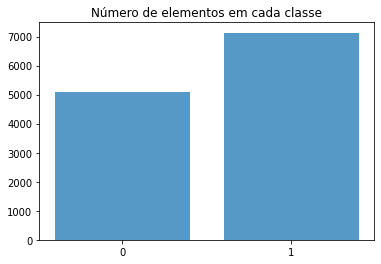

In [ ]:
classes = y
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Portanto, há mais pessoas infectadas do que não-infectadas.

## Análise descritiva dos dados

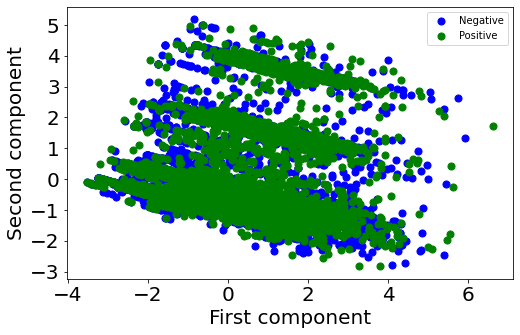

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Positive'
    else:
        lb = 'Negative'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50,
                color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

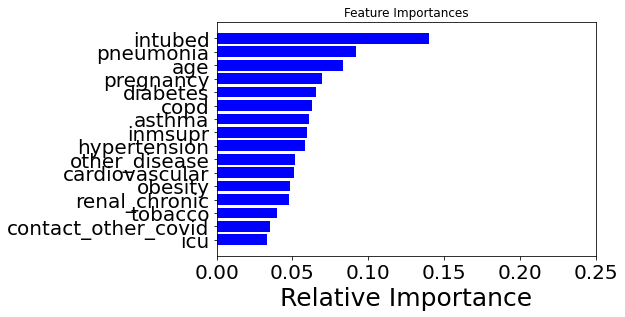

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = X1.columns[0:len(X1.columns)]

indices = np.argsort(importances)

attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

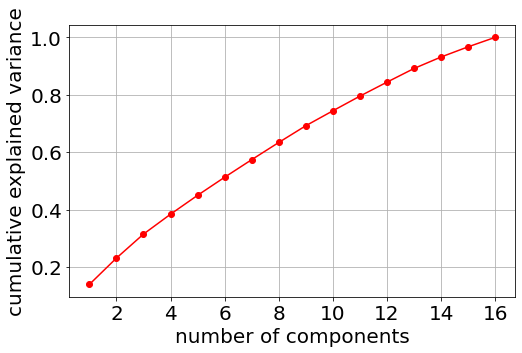

In [ ]:
pca = PCA().fit(X)
ncomp = np.arange(1, np.shape(X)[1]+1)

plt.figure(figsize=(8,5))

plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

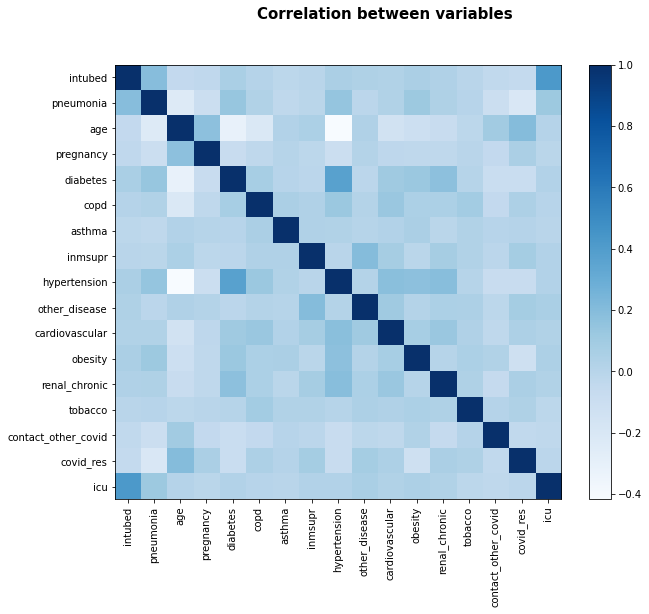

In [ ]:
corr = train.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

## Treinamento do modelo com todos os dados de treinamento

Assim como fizemos para o conjunto de dados anterior, aplicaremos quatro algoritms de classificação para este conjunto também, sendo eles: KNN, árvore de decisão, Naive Bayes e MLP.

Decidimos manter a mesma métrica para a avaliação dos modelos, ou seja, a acurácia. Porém, dessa vez, não é preciso conferir os resultados no site kaggle para descobrir como os melhores modelos performam no conjunto de teste, isto porque separamos os dados, já temos os rótulos que precisamos para avaliarmos nós mesmos a performance do algoritmo.

### KNN

Começando pelo algoritmo de k-vizinhos, temos:

In [ ]:
# criação de 10-folds para a validação cruzada:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
vk = list(range(1, 21))
parametros = {'n_neighbors': vk, 'p': [1,2,3]}
model = KNeighborsClassifier(n_jobs=-1)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [6,17,18,19]]

,params,mean_test_score,std_test_score,rank_test_score
48,"{'n_neighbors': 17, 'p': 1}",0.653018,0.011670,1
59,"{'n_neighbors': 20, 'p': 3}",0.652609,0.013503,2
54,"{'n_neighbors': 19, 'p': 1}",0.652528,0.011921,3
57,"{'n_neighbors': 20, 'p': 1}",0.652282,0.013327,4
56,"{'n_neighbors': 19, 'p': 3}",0.651872,0.012791,5
51,"{'n_neighbors': 18, 'p': 1}",0.651380,0.013016,6
58,"{'n_neighbors': 20, 'p': 2}",0.651135,0.013725,7
55,"{'n_neighbors': 19, 'p': 2}",0.650972,0.014146,8
49,"{'n_neighbors': 17, 'p': 2}",0.650398,0.011764,9
45,"{'n_neighbors': 16, 'p': 1}",0.650070,0.012423,10


É preciso comentar que o resultado do algoritmo foi bem ruim na verdade, próximo de um classificador aleatório que tem 50% de chance de acertar, mas vamos considerar os melhores hiperparâmetros que a busca exaustiva encontrou e ajustar o algoritmo.

In [ ]:
# ajustando o melhor modelo
model = KNeighborsClassifier(n_neighbors=17, p=1, n_jobs=-1)
model.fit(X, y)

# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 66.02%.


### Árvores de decisão

O próximo algoritmo a ser ajustado é a árvore de decisão.

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'criterion': ('gini', 'entropy'),
              'splitter': ('best', 'random'),
              'max_depth': list(range(5,21)),
              'min_samples_leaf': [1,2,3,4,5],
              'max_features': ('auto', 'sqrt', 'log2'),
              'max_leaf_nodes': [10,30,50,70,90,110]
              }
model = DecisionTreeClassifier(min_samples_split=10, random_state=42)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,6,7,8,9,21,22,23]]

,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,mean_test_score,std_test_score,rank_test_score
3954,entropy,10,log2,110,3,best,0.655802,0.016472,1
3894,entropy,10,sqrt,110,3,best,0.655802,0.016472,1
3834,entropy,10,auto,110,3,best,0.655802,0.016472,1
4258,entropy,12,sqrt,110,5,best,0.654820,0.016826,4
4318,entropy,12,log2,110,5,best,0.654820,0.016826,4
4198,entropy,12,auto,110,5,best,0.654820,0.016826,4
1132,gini,11,auto,110,2,best,0.654001,0.012104,7
1192,gini,11,sqrt,110,2,best,0.654001,0.012104,7
1252,gini,11,log2,110,2,best,0.654001,0.012104,7
3944,entropy,10,log2,90,3,best,0.653837,0.013616,10


Consideramos diretamente o melhor resultado segundo a validação cruzada, e ajustaremos o algoritmo de árvore com os parâmetros segundo o resultado da busca exaustiva e faremos a visualização da estrutura da árvore.

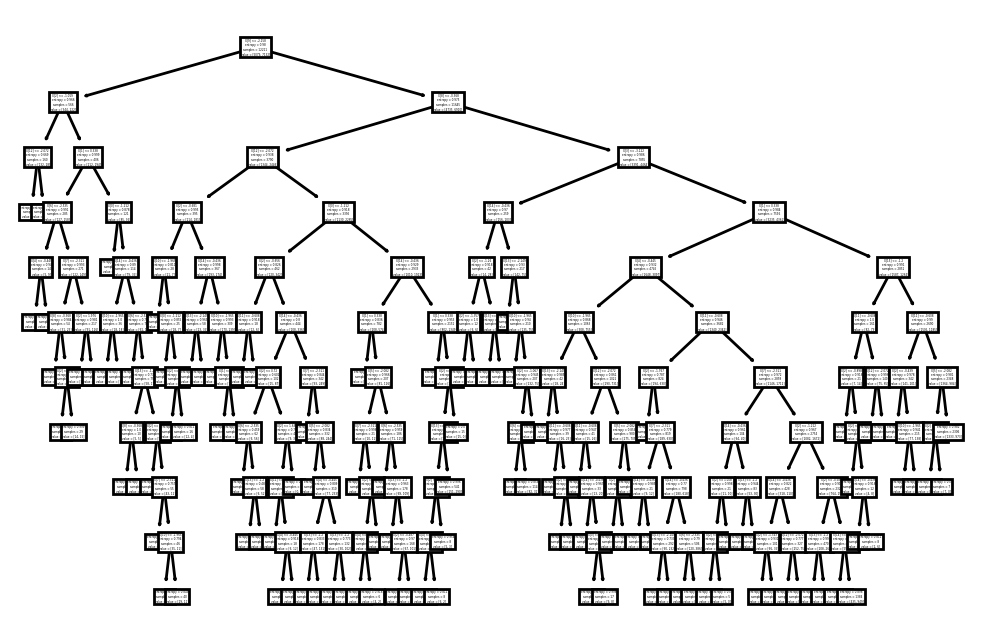

In [ ]:
# ajustando o melhor modelo
model = DecisionTreeClassifier(criterion='entropy', splitter='best',
                               max_depth=10, min_samples_leaf=3,
                               max_features='auto', max_leaf_nodes=110,
                               min_samples_split=10, random_state=42)
model.fit(X,y)

# visualizando a estrutura da arvore
plt.figure(dpi=200)
plot_tree(model)
plt.show()

Novamente é difícil observar a regra definida em cada nó porque a árvore é bem grande e profunda, mas esta é a sua estrutura. Vejamos como o modelo performa no conjunto de teste.

In [ ]:
# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 65.70%.


A acurácia do modelo de árvore de decisão foi próxima a do algoritmo KNN, porém, ainda foi pior.

Além disso, aparentemente este é um conjunto difícil de classificar, os algoritmos não chegam nem a 70% de taxa de acerto.

### Naive Bayes

Seguindo agora para os modelo Naive Bayes, temos:

In [ ]:
nb_norm = GaussianNB()
vacc = []

for train_index, val_index in cv.split(X, y):
    # separando o conjunto de dados
    x_train, x_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # ajustando o modelo para 9-folds
    nb_norm.fit(x_train, y_train)
    # predizendo os valores para 1-fold
    y_pred = nb_norm.predict(x_val)
    # calculando a porcentagem de acurácia
    score = accuracy_score(y_val, y_pred)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')
print(f'Máxima: {100*max(vacc):.2f}%;')
print(f'Mínima: {100*min(vacc):.2f}%.')

----- Acurácia -----
Média: 63.60%;
Máxima: 66.37%;
Mínima: 62.00%.


Vamos considerar novamente o Naive Bayes multinomial, então, é preciso ajustar os dados para o intervalo [0, 1].

In [ ]:
X_aux = X.copy()

for i in range(X.shape[1]):
    if (X_aux[:, i].sum() == 0): continue
    a = X[:, i]
    X_aux[:, i] = (a - min(a))/(max(a) - min(a))

Com os dados ajustados, vejamos os resultados do algoritmo para o conjunto de trieno:

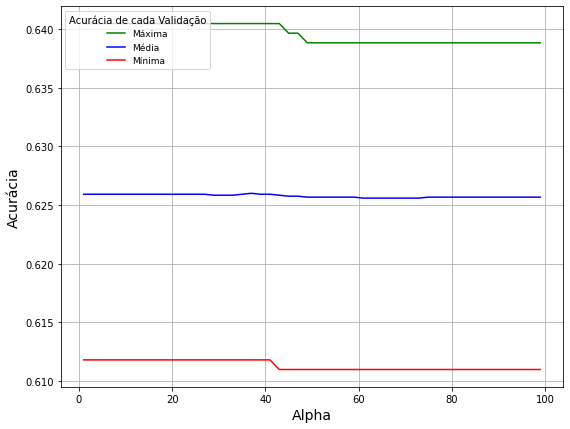

In [ ]:
acc_med = []
acc_max = []
acc_min = []

for alp in range(1, 101, 2):
    nb_mult = MultinomialNB(alpha=alp, fit_prior=False)
    vacc = []

    for train_index, val_index in cv.split(X, y):
        # separando o conjunto de dados
        x_train, x_val = X_aux[train_index], X_aux[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # ajustando o modelo para 9-folds
        nb_mult.fit(x_train, y_train)
        # predizendo os valores para 1-fold
        y_pred = nb_mult.predict(x_val)
        # calculando a porcentagem de acurácia
        score = accuracy_score(y_val, y_pred)
        vacc.append(score)

    acc_med.append(np.mean(vacc))
    acc_min.append(min(vacc))
    acc_max.append(max(vacc))


plt.figure(figsize=(9, 7))

plt.plot(range(1, 101, 2), acc_max, '-g', label='Máxima')
plt.plot(range(1, 101, 2), acc_med, '-b', label='Média')
plt.plot(range(1, 101, 2), acc_min, '-r', label='Mínima')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Acurácia', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=9, loc='upper left', title='Acurácia de cada Validação')
plt.show()

Mais uma vez, o algoritmo gaussiano se mostrou melhor. Assim, ajustando-o com todas as observações de treino e classificando as observações de teste, temos o seguinte resultado:

In [ ]:
# ajustando o melhor modelo
model = GaussianNB()
model.fit(X, y)

# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 63.43%.


E este é o modelo com a pior acurácia até agora, assim como no conjunto de dados anterior.

### Multilayer Perceptron

Agora, o último algoritmo que vamos ajustar será o MLP. Dessa vez, vamos considerar diretamente o optimizador "Adam" para o problema, porque o "LBFGs" funciona melhor para pequenas amostras, como era o caso do conjunto de dados anterior.

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'hidden_layer_sizes': [(16,), (32,), (16,16),
                                     (16,32), (32, 32)],
              'activation': ('relu', 'tanh', 'logistic')
              }
model = MLPClassifier(batch_size=200, solver='adam',
                      learning_rate='invscaling', shuffle=False,
                      random_state=42, max_iter=1500)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,17,18,19]]

,param_activation,param_hidden_layer_sizes,mean_test_score,std_test_score,rank_test_score
1,relu,"(32,)",0.670134,0.011861,1
2,relu,"(16, 16)",0.670052,0.013498,2
5,tanh,"(16,)",0.669970,0.012633,3
12,logistic,"(16, 16)",0.669396,0.013162,4
0,relu,"(16,)",0.668660,0.011007,5
13,logistic,"(16, 32)",0.667677,0.014943,6
7,tanh,"(16, 16)",0.667595,0.010250,7
6,tanh,"(32,)",0.666613,0.013006,8
8,tanh,"(16, 32)",0.665303,0.011949,9
3,relu,"(16, 32)",0.664483,0.015503,10


Agora, como o resultado da validação cruzada e da busca exaustiva, vamos utilizar os hiperparâmetros recomendados para ajustar o melhor algoritmo MLP e analisar como ele performa no conjunto de teste.

In [ ]:
# ajustando o melhor modelo
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu',
                      solver='adam', batch_size=200,
                      learning_rate='invscaling', max_iter=1500,
                      shuffle=False, random_state=42)
model.fit(X, y)

# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 67.24%.


Portanto, temos os resultados de todos os algoritmos e, navamente, os dois melhores foram o KNN e o MLP, eles obteram as melhores acurácia no conjunto de teste.

## Conclusão

Então, para terminar vamos calcular a diferença absoluta entre os dois melhores algoritmos de classificação.

In [ ]:
# diferença absoluta entre KNN e MLP

knn = KNeighborsClassifier(n_neighbors=17, p=1, n_jobs=-1)

mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu',
                    solver='adam', batch_size=200,
                    learning_rate='invscaling', max_iter=1500,
                    shuffle=False, random_state=42)

resultados = {'ACC Médio KNN':[], 'DP ACC KNN': [], 'Tempo Médio KNN': [],
              'ACC Médio MLP':[], 'DP ACC MLP': [], 'Tempo Médio MLP': [],
              'ACC Médio ABS': [], 'DP ACC ABS': []}

# amostragem dos resultados dos modelos:
for i in range(5):
    knn_amostral = []
    dt_knn = []
    mlp_amostral = []
    dt_mlp = []
    dif_amostral = []
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    for ind_train, ind_val in cv.split(X, y):
        # separando em conjuntos de treino e validacao
        x_train, x_test = X[ind_train], X[ind_val]
        y_train, y_test = y[ind_train], y[ind_val]

        # ajustando os modelos para 9-folds
        t_knn = time()
        knn.fit(x_train, y_train)
        dt_knn.append(time() - t_knn)
        t_mlp = time()
        mlp.fit(x_train, y_train)
        dt_mlp.append(time() - t_mlp)

        # calculando as acuracias nos dados de teste
        knn_amostral.append(accuracy_score(Y_test, knn.predict(X_test)))
        mlp_amostral.append(accuracy_score(Y_test, mlp.predict(X_test)))
        dif_amostral.append(abs(knn_amostral[-1] - mlp_amostral[-1]))

    resultados['ACC Médio KNN'].append(np.mean(knn_amostral))
    resultados['DP ACC KNN'].append(np.std(knn_amostral))
    resultados['Tempo Médio KNN'].append(np.mean(dt_knn))
    resultados['ACC Médio MLP'].append(np.mean(mlp_amostral))
    resultados['DP ACC MLP'].append(np.std(mlp_amostral))
    resultados['Tempo Médio MLP'].append(np.mean(dt_mlp))
    resultados['ACC Médio ABS'].append(np.mean(dif_amostral))
    resultados['DP ACC ABS'].append(np.std(dif_amostral))

res = pd.DataFrame(resultados)
round(res, 4)

,ACC Médio KNN,DP ACC KNN,Tempo Médio KNN,ACC Médio MLP,DP ACC MLP,Tempo Médio MLP,ACC Médio ABS,DP ACC ABS
0,0.6607,0.0034,0.0015,0.6755,0.0013,2.5857,0.0149,0.0042
1,0.6588,0.0039,0.0016,0.6760,0.0013,2.7328,0.0172,0.0045
2,0.6592,0.0022,0.0030,0.6755,0.0012,2.7702,0.0163,0.0020
3,0.6614,0.0025,0.0020,0.6748,0.0010,2.2978,0.0134,0.0031
4,0.6614,0.0013,0.0015,0.6748,0.0015,1.9594,0.0134,0.0021


Novamente, temos uma situação parecida com a do problema anterior (Spaceship), isto é, o modelo MLP é melhor do que o KNN, porém não tanto, cerca de 1,5%, e demora muito mais para ser treinado. Então, usando as mesmas justificativas, ficaríamos com o algoritmo KNN, mas dessa vez, consideramos que o tempo de treino do MLP é aceitável em comparação com a melhor acurácia, pois o problema é mais complicado e qualquer porcentagem de acurácia a mais e estremamente importante.

Portanto, se precissásemos escolher, ficaríamos com o modelo MLP para classificar novas observações.

# Preço do Diamante (Maior ou Menor que $5.000)

## 1.0. Contexto

Este conjunto de dados clássico contém os preços e outros atributos de quase 54.000 diamantes.

O nosso objetivo é classificar se o diamante custará mais ou menos de $5.000, de acordo com algumas variáveis que irão ser descritas na seção 3.

## 2.0. IMPORTAÇÕES
---

### 2.1. Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import tensorflow as tf

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

### 2.2. Dados

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/arielchen02/classificacao-preco-dima/main/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Retirando a primeira coluna (index)
df = df.iloc[:, 1:]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Transformando a variável 'price' em categórica
# Se 'price' menor ou igual a 5000 então 0, e se maior que 5000 então 1.

df.loc[df.price <= 5000,'price'] = 0
df.loc[df.price > 5000,'price'] = 1

df['price'] = df['price'].astype(str)
df['price'].value_counts()

0    39226
1    14714
Name: price, dtype: int64

### 2.3. Funções

In [ ]:
def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')
        
def add_model_on_metrics_df(metrics_df, model, model_name):
    '''
    Adiciona linha com modelo e métricas de avaliação: rEQM e R2.
    '''
    model_rmse = np.mean(-cross_val_score(model, X_train, y_train, cv=10,
                                          scoring='neg_root_mean_squared_error'))
    
    model_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=10,
                                       scoring='r2'))
    
    model_line = pd.Series([model_name, model_rmse, model_r2], index=metrics_df.columns)
    
    metrics_df = metrics_df.append(model_line, ignore_index=True)
    
    return metrics_df

## 3.0. DESCRIÇÃO DOS DADOS
---
### 3.1. Descrição das variáveis

- ``price``: menor ou maior que $5000 (0 se menor ou igual, 1 se maior)

- ``carat``: peso em quilate do diamante (0.2 até 5.01).*

- ``cut``: qualidade do corte na ordem crescente: *Fair*, *Good*, *Very Good*, *Premium* e *Ideal*

- ``color``: cor do diamante, do D (melhor) até o J (pior).

- ``clarity``: uma medida de quão claro o diamante é. Seguindo a ordem a seguir, vai do pior até o melhor: (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).

- ``x``: comprimento em mm (0 até 10.74).

- ``y``: largura em mm (0 até 58.9).

- ``z``: espessura em mm (0 até 31.8).

- ``depth``: Porcentagem da espessura = $\frac{z}{\frac{(x+y)}{2}}$ (43--79).

- ``table``: largura do topo do diamante em relação ao ponto mais largo (43--95).

### 3.2. Tipos das variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  object 
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


Os tipos das variáveis estão de acordo com as características delas.

### 3.3. Verificação de valores nulos

In [ ]:
# Soma de valores nulos por coluna
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Não existem valores nulos neste dataset, portanto nenhuma manipulação dos dados será necessária.

### 3.4. Valores duplicados

In [ ]:
# Verifica se existem valores duplicados
print_is_duplicated(df)

Existem valores duplicados? True
Existem no total 342 linhas duplicadas.


In [ ]:
# Porcentagem dos valores duplicados
duplicated_pct = round(df.duplicated().sum() / len(df) * 100, 2)
print(f"Existem {duplicated_pct}% linhas duplicadas neste dataset.")

Existem 0.63% linhas duplicadas neste dataset.


Como existem 0.63% linhas duplicadas no nosso conjunto, vamos excluí-las na seção 4.

### 3.5. Outliers

In [ ]:
df.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


## 4.0. MANIPULAÇÃO DOS DADOS
---
### 4.1. Remoção dos valores duplicados

Conforme na seção 3.4, verificamos que existiam 345 linhas duplicadas, e desta forma, resolvemos removê-las.

In [ ]:
# Remove as linhas duplicadas
df = df.drop_duplicates()

print(f"Este dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

Este dataset possui 53598 linhas e 10 colunas.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,0,4.34,4.35,2.75


## 5.0. ANÁLISE EXPLORATÓRIA DOS DADOS
---
### 5.1. Análise de uma variável

#### 5.1.1. Variável Resposta

In [ ]:
df['price'].value_counts()

0    38985
1    14613
Name: price, dtype: int64

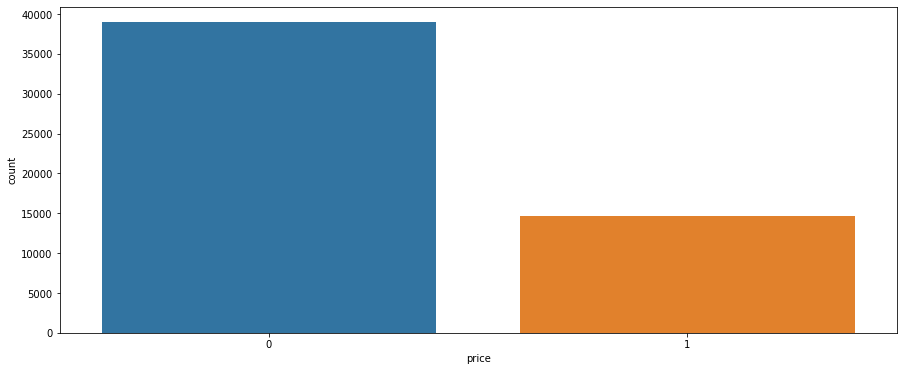

In [ ]:
fig=plt.figure(figsize=(15,6))
ax=sns.countplot(x='price', data=df)
plt.show()

### 5.1.2. Variáveis Categóricas

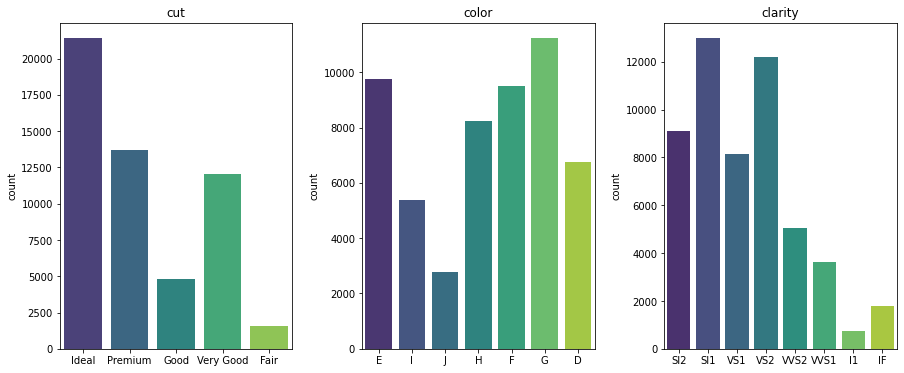

In [ ]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

* Nosso conjunto de dados contém muitas observações com o corte "ideal".
* Os dados estão bem desbalanceados para cada categoria de cada variável.



### 5.1.3. Variáveis Quantitativas

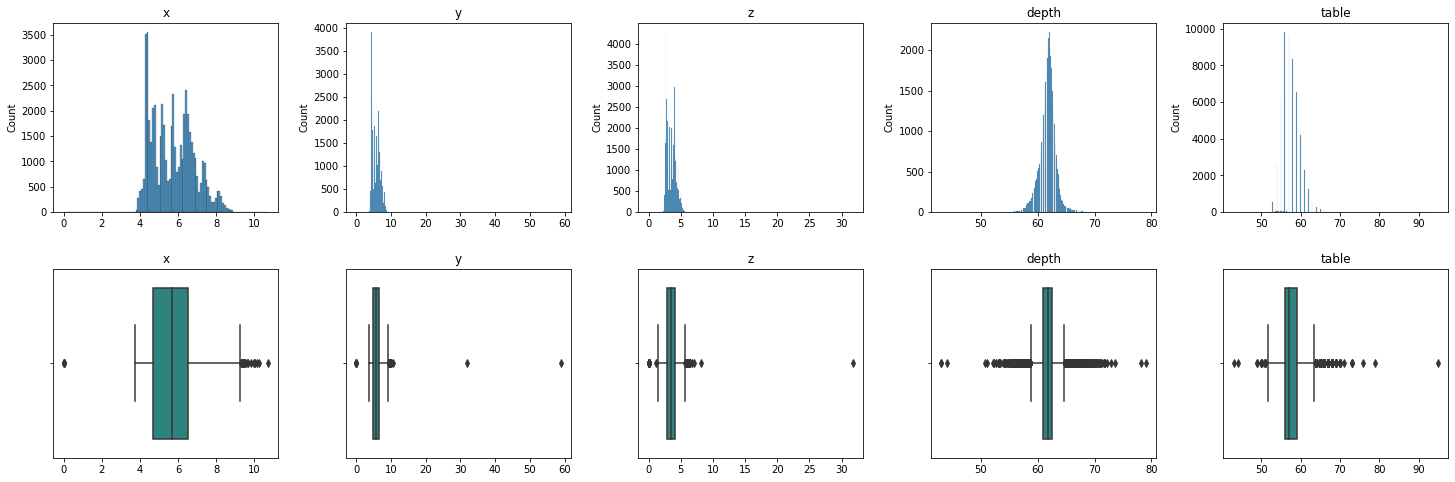

In [ ]:
quant=['x','y','z','depth','table']
fig=plt.figure(figsize=(25,8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 6):
    plt.subplot(2, 5, i)
    ax = sns.histplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])

for i in range(1, 6):
    plt.subplot(2, 5, i+5)
    ax = sns.boxplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])
plt.show()

* Para a variável "depth", temos uma distribuição muito simétrica, lembrando uma distribuição normal 
* Existem outliers em todas as variáveis quantitativas. Apesar disso, resolvemos não descartá-los porque, em nosso contexto de negócio, isso pode ser normal.

### 5.2. Análise de duas variáveis
#### 5.2.1. Variáveis Categóricas x price

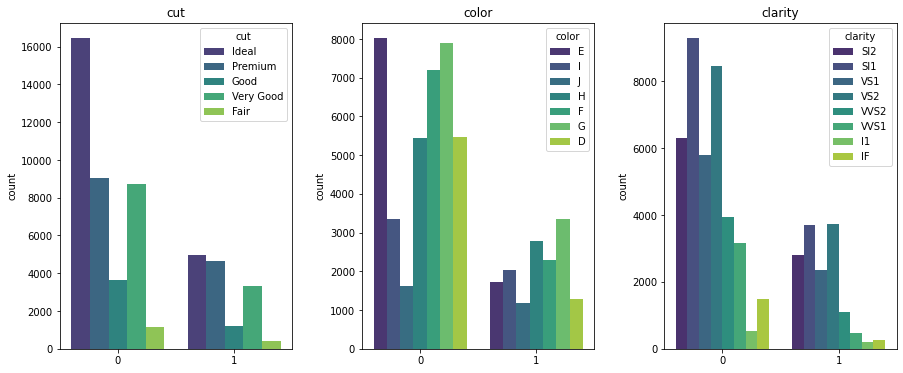

In [ ]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x="price", hue=cate[i-1], data=df, palette="viridis")
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

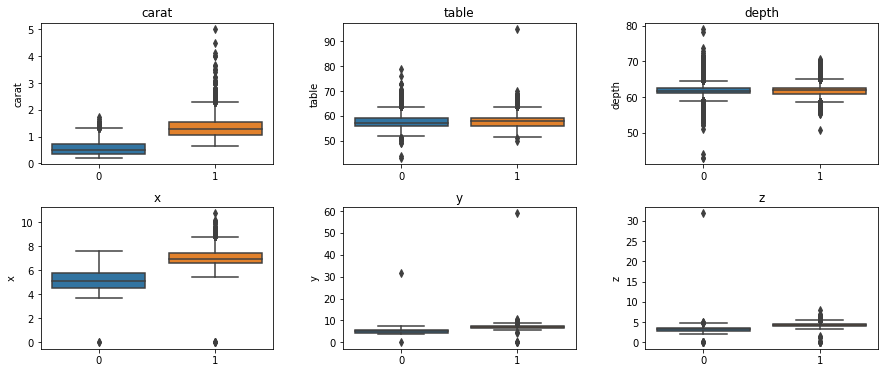

In [ ]:
quant=['carat', 'table', 'depth','x', 'y', 'z']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(x ='price',y = quant[i-1], data = df)
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])
plt.show()

Mapa de correlações:

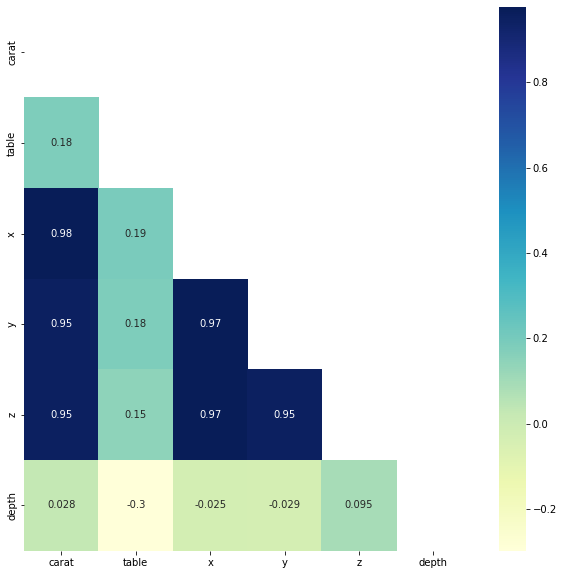

In [ ]:
# Mapa de correlações
plt.figure(figsize=(10,10))
corr = df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True);


Note que "x", "y" e "z" estão fortemente correlacionadas com a variável "carat". Dessa forma, resolvemos removê-las do modelo, uma vez que "carat" já explica essas três variáveis e menos variáveis deixa o modelo mais simples.

## 6.0. PRÉ-PROCESSAMENTO DOS DADOS
---

In [ ]:
#Cópia do dataframe
df6 = df.copy()

### 6.1. Encoding

O processo de enconding transforma as variáveis categóricas oridinais em numéricas para facilitar a modelagem.

Na transformação, convencionamos que quanto maior o valor numérico, maior nível categórico, de forma proporcional. 





In [ ]:
# Definição das variáveis numéricas e categóricas

var_num = ['carat','depth', 'table']
var_cat = ['cut', 'color', 'clarity']

# Ordenação das variáveis
df6 = df6[['carat', 'depth', 'table', 'cut', 'color', 'clarity', 'price']]

# Dicionário para encoding
cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity = {'I1':1,  'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Encoding das variáveis categóricas
df6['cut'] = df6['cut'].replace(cut)
df6['color'] = df6['color'].replace(color)
df6['clarity'] = df6['clarity'].replace(clarity)

In [ ]:
df6.head()

,carat,depth,table,cut,color,clarity,price
0,0.23,61.5,55.0,5,6,2,0
1,0.21,59.8,61.0,4,6,3,0
2,0.23,56.9,65.0,2,6,5,0
3,0.29,62.4,58.0,4,2,4,0
4,0.31,63.3,58.0,2,1,2,0


### 6.2. Divisão dos dados em Treino e Teste

Dividimos o dataframe que será utilizado nos métodos de regressão analisados em 80% para treino e 20% para teste.

In [ ]:
# Variável dependente e independentes
X = df6.drop('price', axis=1).values

y = df6['price'].values

In [ ]:
# 80% para treino, e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.3. Rescaling

Utilizamos a técnica de Robust Scaler para a padronização dos dados pois o conjunto de dados contém outliers, e esse método utiliza os quantis para a padronização, lidando melhor do que a técnica de Standard Scaler e MinMax Scaler nessa situação.

In [ ]:
# Definindo o robust scaler
rs = RobustScaler()

# Transformando as colunas
X_train[:, :5] = rs.fit_transform(X_train[:, :5])
X_test[:, :5] = rs.transform(X_test[:, :5])

## 7.0. Aplicação dos modelos
---

Utilização de validação cruzada (10-fold cross validation) nos
experimentos

Aplicar os seguintes algoritmos de classificação com diferentes
configurações (hiperparâmetros):
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Árvores de Decisão
- Multilayer Perceptron (MLP)


In [ ]:
# criação de 10-folds para a validação cruzada:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### 7.1. KNN

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
vk = list(range(5,51,5))
parametros = {'n_neighbors': vk, 'p': [1,2,3,4]}
model = KNeighborsClassifier(n_jobs=-1)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X_train, y_train)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [6,17,18,19]]

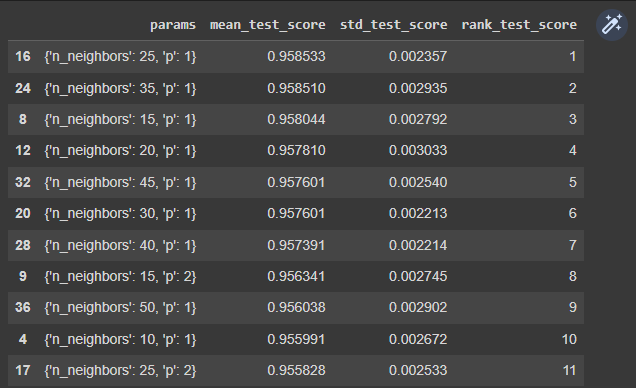

Vendo os melhores resultados, vamos considerar diretamente o melhor modelo segundo a métrica de acurácia, ou seja, 25 "vizinhos" e função de "Minkowski" com p valendo um.

In [ ]:
model = KNeighborsClassifier(n_neighbors=25, p=1, n_jobs=-1)
vacc = []

for train_index, val_index in cv.split(X_train, y_train):
    # separando o conjunto de dados
    X2_train, X2_test = X_train[train_index], X_train[val_index]
    y2_train, y2_test = y_train[train_index], y_train[val_index]

    model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)

    # calculando a porcentagem de acurácia
    score = accuracy_score(y_pred, y2_test)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')

Usando o modelo KNN obtivemos uma acurácia boa de 95.85% após o tunning dos parâmetros.

### 7.2. Naive Bayes

In [ ]:
nb_bern = BernoulliNB()
vacc = []

for train_index, val_index in cv.split(X_train, y_train):
    # separando o conjunto de dados
    X2_train, X2_test = X_train[train_index], X_train[val_index]
    y2_train, y2_test = y_train[train_index], y_train[val_index]

    nb_bern.fit(X2_train, y2_train)
    y_pred = nb_bern.predict(X2_test)

    # calculando a porcentagem de acurácia
    score = accuracy_score(y_pred, y2_test)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')

Com o Naive Bayes, a acurácia obtida com o modelo foi bem menor, de apenas 77.88%.

### 7.3. DecisionTree


In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'criterion': ('gini', 'entropy'),
              'splitter': ('best', 'random'),
              'max_depth': list(range(5,21,5)),
              'min_samples_leaf': [1,3,5],
              'max_features': ('auto', 'sqrt', 'log2'),
              'max_leaf_nodes': [10,30,50]
              }
              
model = DecisionTreeClassifier(min_samples_split=10, random_state=42)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X_train, y_train)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,6,7,8,9,21,22,23]]

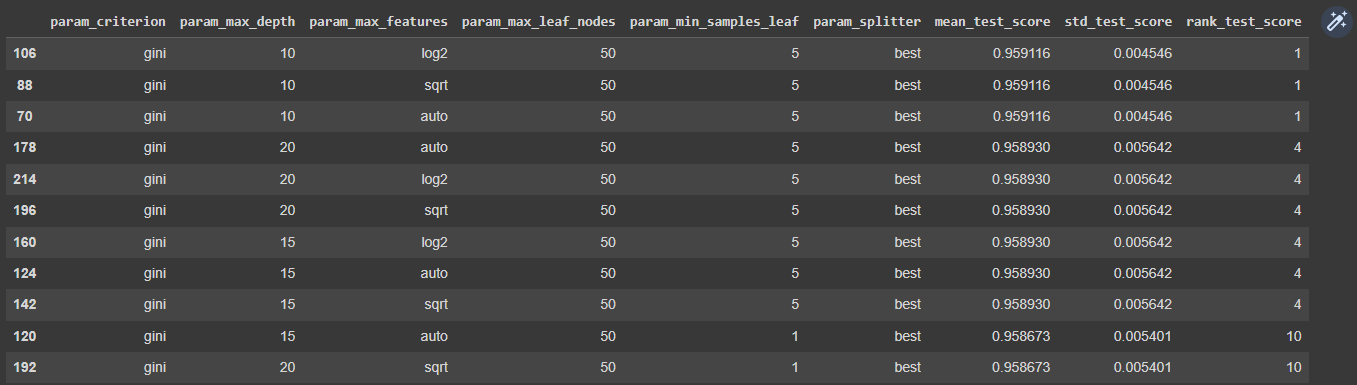

Temos que os melhores resultados são obtidos com o critério de gini, cinco observação por folha, profundidade máxima de 10 e no máximo 50 folhas, sendo o modo de escolha da quantidade de atributos irrelevante. Assim, vejamos como é a estrutura da melhor árvore de decisão a seguir.

In [ ]:
# ajustando o melhor modelo
model = DecisionTreeClassifier(criterion='gini', splitter='best',
                               max_depth=10, min_samples_leaf=5,
                               max_features='auto', max_leaf_nodes=50,
                               min_samples_split=10, random_state=42)
model.fit(X_train,y_train)

# visualizando a estrutura da arvore
plt.figure(dpi=200)
plot_tree(model)
plt.show()

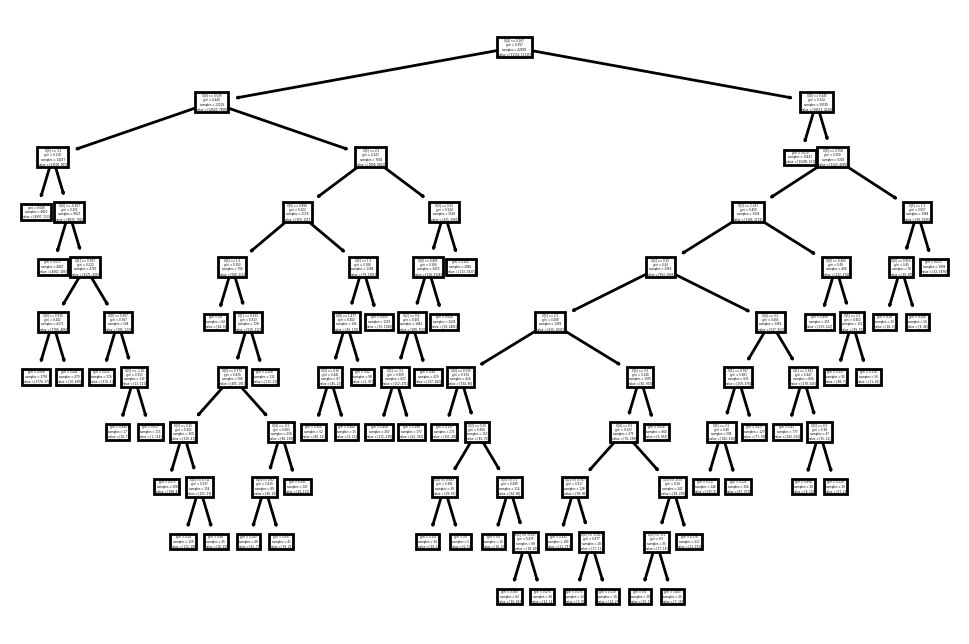

In [ ]:
model = DecisionTreeClassifier(criterion='gini', splitter='best',
                               max_depth=10, min_samples_leaf=5,
                               max_features='auto', max_leaf_nodes=50,
                               min_samples_split=10, random_state=42)
vacc = []

for train_index, val_index in cv.split(X_train, y_train):
    # separando o conjunto de dados
    X2_train, X2_test = X_train[train_index], X_train[val_index]
    y2_train, y2_test = y_train[train_index], y_train[val_index]

    model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)

    # calculando a porcentagem de acurácia
    score = accuracy_score(y_pred, y2_test)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')

Com o DecisionTree conseguimos uma acurácia de 95,91%, a melhor acurária obtida até então quando comparado ao KNN e Naive Bayes que teve a pior acurácia de 77,88%.

### 7.4. Perceptron Multicamadas

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'hidden_layer_sizes': [(16,), (32,), (16,16),
                                     (16,32), (32, 32)],
              'activation': ('relu', 'tanh', 'logistic'),
              'solver': ('adam', 'lbfgs')
              }
model = MLPClassifier(batch_size=200, learning_rate='invscaling',
                      shuffle=False, random_state=42, max_iter=1000)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X_train, y_train)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,6,18,19,20]]

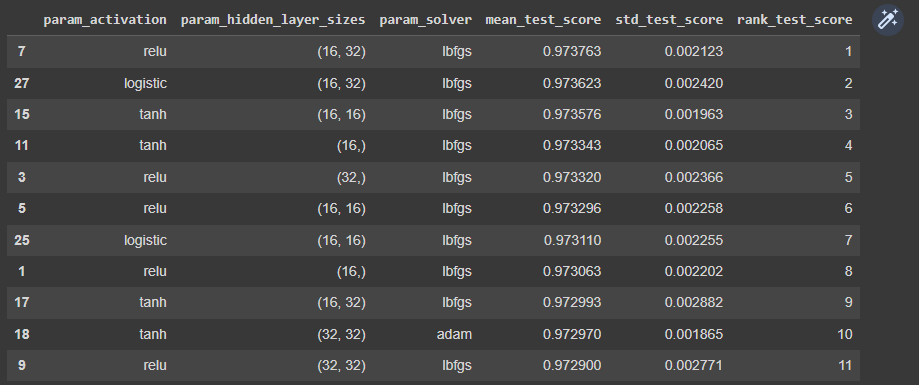

Observe que o modelo MLP exigiu um poder computacional bem maior que os outros três modelos testados até então, para o tunning dos hiperparâmetros foi necessário quase 3 horas para conseguirmos os melhores parâmetros.

Com isso, vamos verificar a acurácia dele

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(16,32), activation='relu',
                       solver='lbfgs', batch_size=200,
                       learning_rate='invscaling', max_iter=1000,
                       shuffle=False, random_state=42
                      )
vacc = []
for train_index, val_index in cv.split(X_train, y_train):
    # separando o conjunto de dados
    X2_train, X2_test = X_train[train_index], X_train[val_index]
    y2_train, y2_test = y_train[train_index], y_train[val_index]

    model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)

    # calculando a porcentagem de acurácia
    score = accuracy_score(y_pred, y2_test)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')

Por último, testamos o modelo MLP que apresentou a melhor acurácia de 97.33% entre todos os modelos testados.

### 8.0. Resultados
---

Visto cada modelo, temos os seguintes resultados indo da maior para a menor acurácia dos modelos.

- Multilayer Perceptron (MLP): 97.33% acurácia
- DecisionTree: 95.91% acurácia
-  K-Nearest Neighbors (KNN): 95.85% acurácia
- Naive Bayes: 77.88 acurácia


# Avaliação de Veículos


## Introdução

Esta base de dados contem informações de veículos com a intenção de avaliar se é uma boa aquisição ou não.

## Importação

In [ ]:
#setup:
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from scipy.stats import multivariate_normal

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ParraGus/IA-2022/main/car_evaluation.csv', header=(0))
data.head(10)


,buying_value,maintenance_value,doors,persons,lug_boots,safety,evaluate
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## Descrição dos Dados


### Variáveis

- ``buying_value``: Valor de Compra do veículo , definido entre *low*, *med*, *high* e *v-high*.
- ``maintenance_value``: Custo de manutenção do veículo , definido entre *low*, *med*, *high* e *v-high*.
- ``doors``: Número de portas do veículo.
- ``persons``: Número de pessoas comportadas no veículo.
- ``lug_boots	``: Tamanho do porta-malas, definido entre *small*, *med*, e *big*.
- ``safety	``: Segurança do veículo, definida entre *low*, *med*, e *high*.


## Tipos de Variáveis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_value       1728 non-null   object
 1   maintenance_value  1728 non-null   object
 2   doors              1728 non-null   object
 3   persons            1728 non-null   object
 4   lug_boots          1728 non-null   object
 5   safety             1728 non-null   object
 6   evaluate           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Limpeza de Dados

Vamos verificar se existem valores nulos - NaN. 

In [ ]:
data.isnull().sum().sort_values(ascending=False)

buying_value         0
maintenance_value    0
doors                0
persons              0
lug_boots            0
safety               0
evaluate             0
dtype: int64

Logo, a base de dados não contém valores nulos. A seguir, vamos verificar a quantidade de cada classificação.

### Análise da variável resposta

In [ ]:
data['evaluate'].value_counts().to_frame()

,evaluate
unacc,1210
acc,384
good,69
vgood,65


## Análise Exploratória


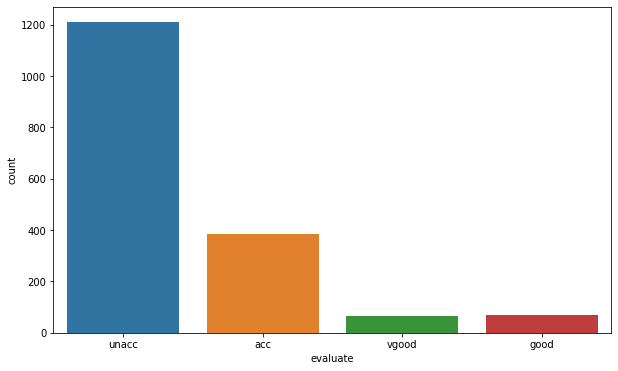

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='evaluate', data=data)
plt.show()

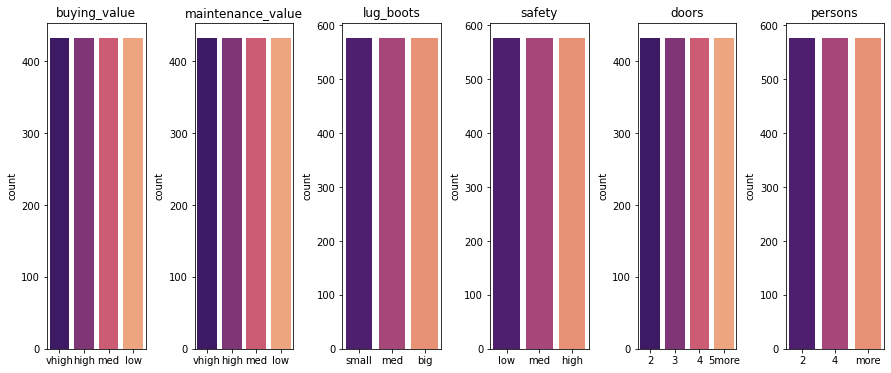

In [ ]:
cate=['buying_value','maintenance_value','lug_boots', 'safety', 'doors', 'persons']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 7):
    plt.subplot(1, 6, i)
    ax = sns.countplot(x=cate[i-1], data=data, palette="magma")
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

Os dados são muito balanceados.

### Análise das variáveis em relação à Classificação.

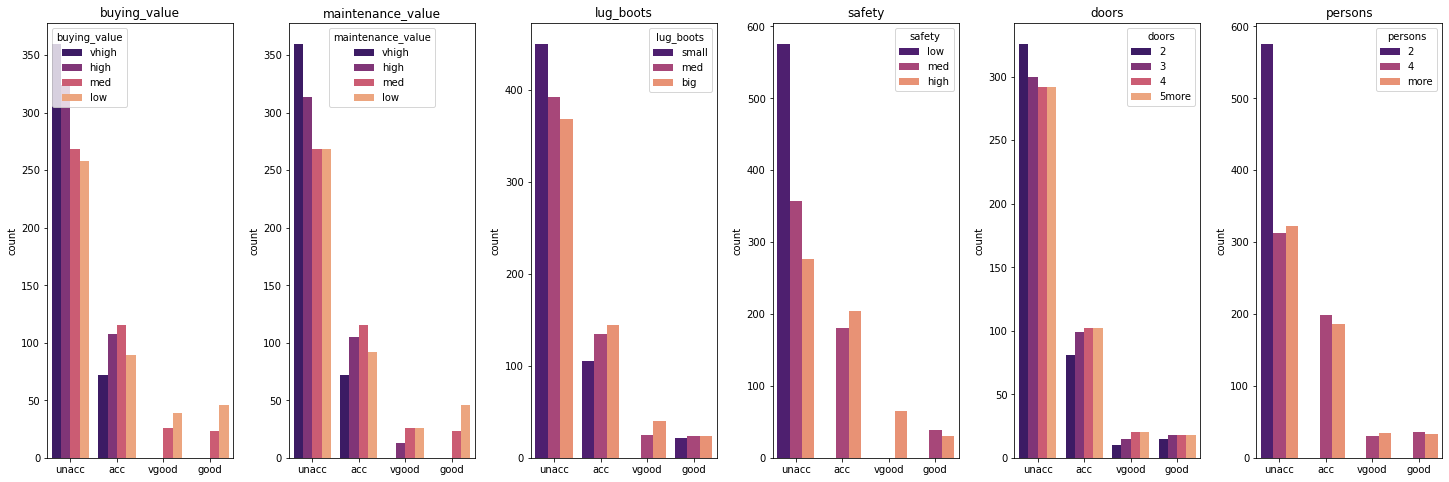

In [ ]:
cate=['buying_value','maintenance_value','lug_boots', 'safety', 'doors', 'persons']
fig=plt.figure(figsize=(25,8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 7):
    plt.subplot(1, 6, i)
    sns.countplot(x="evaluate", hue=cate[i-1], data=data, palette="magma")
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

Verificamos que para todas as variáveis, a grande maioria dos veículos teve baixa avaliação, com uma correlação um pouco maior em relação ao preço de compra.

## Encoding

Aplicamos o encoding pois todas as variáveis são categóricas, o que dificulta a modelagem.

In [ ]:
# Dicionário para encoding
buying_value = {'vhigh':1, 'high':2, 'med':3, 'low':4}
maintenance_value = {'vhigh':1, 'high':2, 'med':3, 'low':4}
lug_boots = {'big':1,  'med':2, 'small':3}
safety = {'high':1, 'med':2, 'low': 3}
doors = {2:2, 3:3, 4:4, '5more':5}
persons = {2:2, 4:4, 'more':5}


data['buying_value'] = data['buying_value'].replace(buying_value)
data['maintenance_value'] = data['maintenance_value'].replace(maintenance_value)
data['lug_boots'] = data['lug_boots'].replace(lug_boots)
data['safety'] = data['safety'].replace(safety)
data['doors'] = data['doors'].replace(doors)
data['persons'] = data['persons'].replace(persons)




## Aplicação dos Modelos de Classificação


### Divisão dos dados em treino e teste

In [ ]:
train, test = train_test_split(data, test_size=0.4, random_state=42)

y1 = train['evaluate']
x1 = train.drop('evaluate', axis=1, inplace=False)

Convertendo dados para numpy

In [ ]:
Y = y1.to_numpy()
X = x1.to_numpy()

Y_test = test['evaluate']
X_test = test.drop('evaluate', axis=1, inplace = False)

Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

Normalizando os dados


In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

## Treinamento do modelo com os dados de treino

In [ ]:
# Criação de 10 folds para validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## KNN


In [ ]:
vk = list(range(1, 21))
parametros = {'n_neighbors': vk, 'p': [1,2,3]}
model = KNeighborsClassifier(n_jobs=-1)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, Y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [6,17,18,19]]

# ajustando o melhor modelo
model = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1)
model.fit(X, Y)

# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 95.81%.


Este resultado indica que a classificação por KNN é excelente para este conjunto de dados.

## Árvore de Decisão

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'criterion': ('gini', 'entropy'),
              'splitter': ('best', 'random'),
              'max_depth': list(range(5,21)),
              'min_samples_leaf': [1,2,3,4,5],
              'max_features': ('auto', 'sqrt', 'log2'),
              'max_leaf_nodes': [10,30,50,70,90,110]
              }
model = DecisionTreeClassifier(min_samples_split=10, random_state=42)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, Y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,6,7,8,9,21,22,23]]

,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,mean_test_score,std_test_score,rank_test_score
3804,entropy,10,auto,50,3,best,0.907338,0.035528,1
4044,entropy,11,sqrt,50,3,best,0.907338,0.035528,1
4764,entropy,15,sqrt,50,3,best,0.907338,0.035528,1
5364,entropy,18,log2,50,3,best,0.907338,0.035528,1
4224,entropy,12,sqrt,50,3,best,0.907338,0.035528,1
5724,entropy,20,log2,50,3,best,0.907338,0.035528,1
4584,entropy,14,sqrt,50,3,best,0.907338,0.035528,1
4884,entropy,16,auto,50,3,best,0.907338,0.035528,1
4704,entropy,15,auto,50,3,best,0.907338,0.035528,1
3864,entropy,10,sqrt,50,3,best,0.907338,0.035528,1


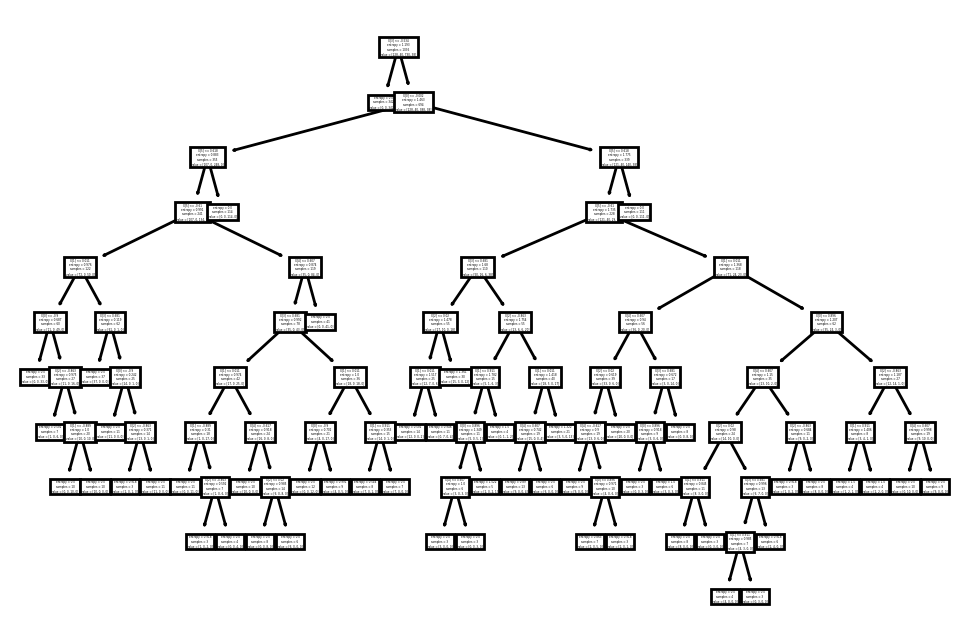

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best',
                               max_depth=10, min_samples_leaf=3,
                               max_features='auto', max_leaf_nodes=50,
                               min_samples_split=3, random_state=42)
model.fit(X,Y)

# visualizando a estrutura da arvore
plt.figure(dpi=200)
plot_tree(model)
plt.show()

In [ ]:
# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 90.46%.


Este resultado indica que, mesmo sendo inferior ao KNN, a classificação por árvore de decisão é excelente também.

## Naive Bayes

Vamos considerar Naive Bayes Bernoulli, ajustado os dados no intervalo [0,1]

In [ ]:
nb_norm = GaussianNB()
vacc = []

for train_index, val_index in cv.split(X, Y):
    # separando o conjunto de dados
    x_train, x_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

    # ajustando o modelo para 9-folds
    nb_norm.fit(x_train, y_train)
    # predizendo os valores para 1-fold
    y_pred = nb_norm.predict(x_val)
    # calculando a porcentagem de acurácia
    score = accuracy_score(y_val, y_pred)
    vacc.append(score)

print(5*'-'+' Acurácia '+'-'*5)
print(f'Média: {100*np.mean(vacc):.2f}%;')
print(f'Máxima: {100*max(vacc):.2f}%;')
print(f'Mínima: {100*min(vacc):.2f}%.')

----- Acurácia -----
Média: 76.16%;
Máxima: 81.55%;
Mínima: 72.12%.


In [ ]:
X_aux = X.copy()

for i in range(X.shape[1]):
    if (X_aux[:, i].sum() == 0): continue
    a = X[:, i]
    X_aux[:, i] = (a - min(a))/(max(a) - min(a))

Resultados do algoritmo para o conjunto de treino:

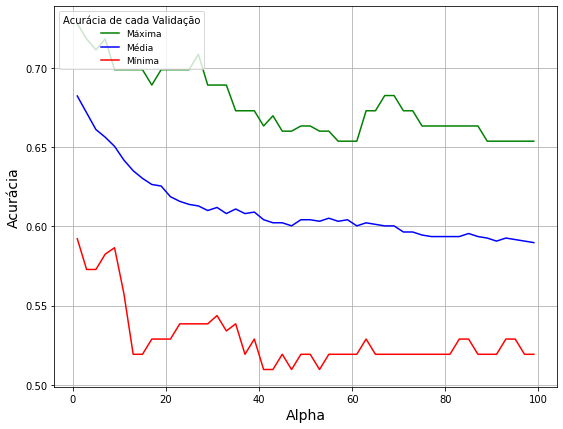

In [ ]:
acc_med = []
acc_max = []
acc_min = []

for alp in range(1, 101, 2):
    nb_mult = MultinomialNB(alpha=alp, fit_prior=False)
    vacc = []

    for train_index, val_index in cv.split(X, Y):
        # separando o conjunto de dados
        x_train, x_val = X_aux[train_index], X_aux[val_index]
        y_train, y_val = Y[train_index], Y[val_index]

        # ajustando o modelo para 9-folds
        nb_mult.fit(x_train, y_train)
        # predizendo os valores para 1-fold
        y_pred = nb_mult.predict(x_val)
        # calculando a porcentagem de acurácia
        score = accuracy_score(y_val, y_pred)
        vacc.append(score)

    acc_med.append(np.mean(vacc))
    acc_min.append(min(vacc))
    acc_max.append(max(vacc))


plt.figure(figsize=(9, 7))

plt.plot(range(1, 101, 2), acc_max, '-g', label='Máxima')
plt.plot(range(1, 101, 2), acc_med, '-b', label='Média')
plt.plot(range(1, 101, 2), acc_min, '-r', label='Mínima')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('Acurácia', fontsize = 14)
plt.grid(True)
plt.legend(fontsize=9, loc='upper left', title='Acurácia de cada Validação')
plt.show()

In [ ]:
# ajustando o melhor modelo
model = BernoulliNB()
model.fit(X, Y)

# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 79.48%.


Este resultado é o pior dentre todos os modelos de classificação verificados, com uma diferença maior que 10% em relação aos outros.

## MLP

Vamos utilizar por último o Multilayer Perceptron, com o otimizador "LBFGs" devido a amostra não ser muito grande e sua acurácia ser maior em relação ao otimizador "Adam".

In [ ]:
# selecionandos os melhores hiperparametros a partir do
# conjunto de treino e usando validacao cruzada:
parametros = {'hidden_layer_sizes': [(16,), (32,), (16,16),
                                     (16,32), (32, 32)],
              'activation': ('relu', 'tanh', 'logistic')
              }
model = MLPClassifier(batch_size=200, solver='adam',
                      learning_rate='invscaling', shuffle=False,
                      random_state=42, max_iter=1500)

grid = GridSearchCV(model, parametros, n_jobs=-1, cv=cv)
grid.fit(X, Y)

res = pd.DataFrame(grid.cv_results_)
res = res.sort_values(by='rank_test_score')
res.iloc[0:11, [4,5,17,18,19]]

,param_activation,param_hidden_layer_sizes,mean_test_score,std_test_score,rank_test_score
14,logistic,"(32, 32)",0.982646,0.012010,1
9,tanh,"(32, 32)",0.982636,0.012765,2
3,relu,"(16, 32)",0.980695,0.009616,3
4,relu,"(32, 32)",0.978781,0.005732,4
8,tanh,"(16, 32)",0.977838,0.011398,5
6,tanh,"(32,)",0.974944,0.014381,6
7,tanh,"(16, 16)",0.974935,0.015037,7
13,logistic,"(16, 32)",0.973982,0.016106,8
11,logistic,"(32,)",0.973964,0.017251,9
10,logistic,"(16,)",0.972993,0.013488,10


Com os resultados da validação cruzada e da busca exaustiva, vamos utilizar os hiperparâmetros recomendados para ajustar o melhor algoritmo MLP e verificar como ele performa no conjunto de teste.

In [ ]:
# ajustando o melhor modelo
model = MLPClassifier(hidden_layer_sizes=(32,32), activation='logistic',
                      solver='lbfgs', batch_size=200,
                      learning_rate='invscaling', max_iter=1500,
                      shuffle=False, random_state=42)
model.fit(X, Y)

# acuracia no conjunto de teste
Y_hat = model.predict(X_test)
acc = accuracy_score(Y_test, Y_hat)
print(f"A acurácia do conjunto de teste é {100*acc:.2f}%.")

A acurácia do conjunto de teste é 96.97%.


Esta é a melhor acurácia dentre todos os modelos verificados. No entanto, o tempo de execução é relativamente alto e iremos no próximo tópico analisar a sua utilização ou não.

## Diferença absoluta entre os modelos.

Conforme visto, os melhores modelos foram o MLP e o KNN, com relativa vantagem aos demais. Para comparar e escolher o melhor, analizamos as diferenças entre os dois em alguns critérios como acurácia máxima e tempo de execução.

In [ ]:
# diferença absoluta entre KNN e MLP

knn = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1)

mlp = MLPClassifier(hidden_layer_sizes=(32,32), activation='logistic',
                    solver='lbfgs', batch_size=200,
                    learning_rate='invscaling', max_iter=1500,
                    shuffle=False, random_state=42)

resultados = {'ACC Médio KNN':[], 'DP ACC KNN': [], 'Tempo Médio KNN': [],
              'ACC Médio MLP':[], 'DP ACC MLP': [], 'Tempo Médio MLP': [],
              'ACC Médio ABS': [], 'DP ACC ABS': []}

# amostragem dos resultados dos modelos:
for i in range(5):
    knn_amostral = []
    dt_knn = []
    mlp_amostral = []
    dt_mlp = []
    dif_amostral = []
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    for ind_train, ind_val in cv.split(X, Y):
        # separando em conjuntos de treino e validacao
        x_train, x_test = X[ind_train], X[ind_val]
        y_train, y_test = Y[ind_train], Y[ind_val]

        # ajustando os modelos para 9-folds
        t_knn = time()
        knn.fit(x_train, y_train)
        dt_knn.append(time() - t_knn)
        t_mlp = time()
        mlp.fit(x_train, y_train)
        dt_mlp.append(time() - t_mlp)

        # calculando as acuracias nos dados de teste
        knn_amostral.append(accuracy_score(Y_test, knn.predict(X_test)))
        mlp_amostral.append(accuracy_score(Y_test, mlp.predict(X_test)))
        dif_amostral.append(abs(knn_amostral[-1] - mlp_amostral[-1]))

    resultados['ACC Médio KNN'].append(np.mean(knn_amostral))
    resultados['DP ACC KNN'].append(np.std(knn_amostral))
    resultados['Tempo Médio KNN'].append(np.mean(dt_knn))
    resultados['ACC Médio MLP'].append(np.mean(mlp_amostral))
    resultados['DP ACC MLP'].append(np.std(mlp_amostral))
    resultados['Tempo Médio MLP'].append(np.mean(dt_mlp))
    resultados['ACC Médio ABS'].append(np.mean(dif_amostral))
    resultados['DP ACC ABS'].append(np.std(dif_amostral))

res = pd.DataFrame(resultados)
round(res, 4)

,ACC Médio KNN,DP ACC KNN,Tempo Médio KNN,ACC Médio MLP,DP ACC MLP,Tempo Médio MLP,ACC Médio ABS,DP ACC ABS
0,0.9546,0.0016,0.0039,0.9605,0.0078,0.8372,0.0077,0.0063
1,0.9561,0.0026,0.0041,0.9611,0.0066,0.8554,0.0068,0.0041
2,0.9552,0.0023,0.0025,0.9604,0.0060,0.6826,0.0066,0.0041
3,0.9555,0.0025,0.0038,0.9618,0.0055,1.1419,0.0072,0.0044
4,0.9559,0.0027,0.0026,0.9575,0.0091,0.5209,0.0074,0.0063


## Conclusão

Verificamos acima que o modelo MLP é, de fato, melhor que o KNN porém com pouquíssima vantagem - menos de 1% - porém com tempo de execução muito superior. Este fato torna o modelo KNN mais indicado para esta base de dados. No entanto, vale ressaltar que este problema é simples e a base de dados relativamente pequena, aproximando e otimizando acurácia e tempo de execução para ambos os modelos. Para uma base de dados maior, ou até mesmo uma nova base de dados, seria indicado o modelo MLP pois garantiria maior acurácia, apesar do provável aumento do tempo de execução.